In [46]:
#import matlab.engine 
import os
import scipy.io
import h5py
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from tqdm import tqdm
import IProgress
import scipy as sp
from neurodsp.filt import filter_signal
from scipy.signal import butter, filtfilt
from scipy.signal import find_peaks

# Import spectral power functions
from neurodsp.spectral import compute_spectrum, rotate_powerlaw

# Import utilities for loading and plotting data
from neurodsp.utils import create_times
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series
from neurodsp.filt import filter_signal

# Import the FOOOF object
from fooof import FOOOF
from fooof.sim.gen import gen_aperiodic
from fooof.plts.spectra import plot_spectra
from fooof.plts.annotate import plot_annotated_peak_search

In [4]:
filename = r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\lfp_psych_07-29-24\lfp_downsampled\combined_lfp_data.h5"
with h5py.File(filename, 'r') as file:
    ds_wells_data = file['all_wells_data'][:]
print(ds_wells_data.shape)
# Since the dimensions are flipped, we need to transpose them
ds_wells_data = np.transpose(ds_wells_data, (2, 1, 0))

# Now ds_wells_data_corrected should have the correct shape
print(ds_wells_data.shape)

(60025, 8, 6)
(6, 8, 60025)


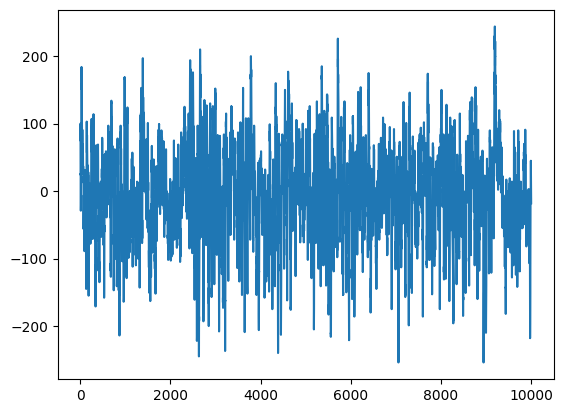

In [5]:
plt.plot(ds_wells_data[0][3][:10000])

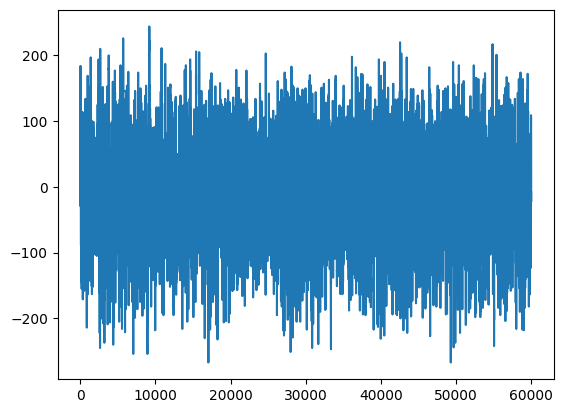

In [4]:
plt.plot(ds_wells_data[0][3][:])

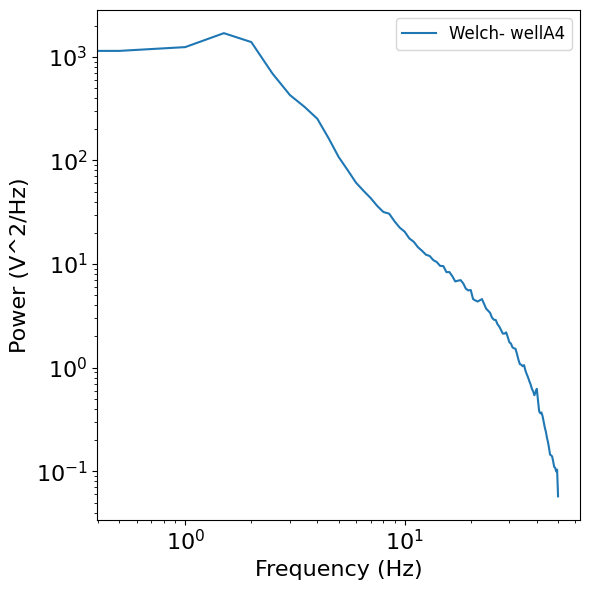

In [6]:
fs_ds = 100
sig = ds_wells_data[0][3]

freq_mean, psd_mean = compute_spectrum(sig, fs_ds, method='welch', avg_type='mean', nperseg=fs_ds*2)
                
                # Plot the power spectra
plot_power_spectra([freq_mean[:]],
                                   [psd_mean[:]],
                                   [f'Welch- wellA4'])

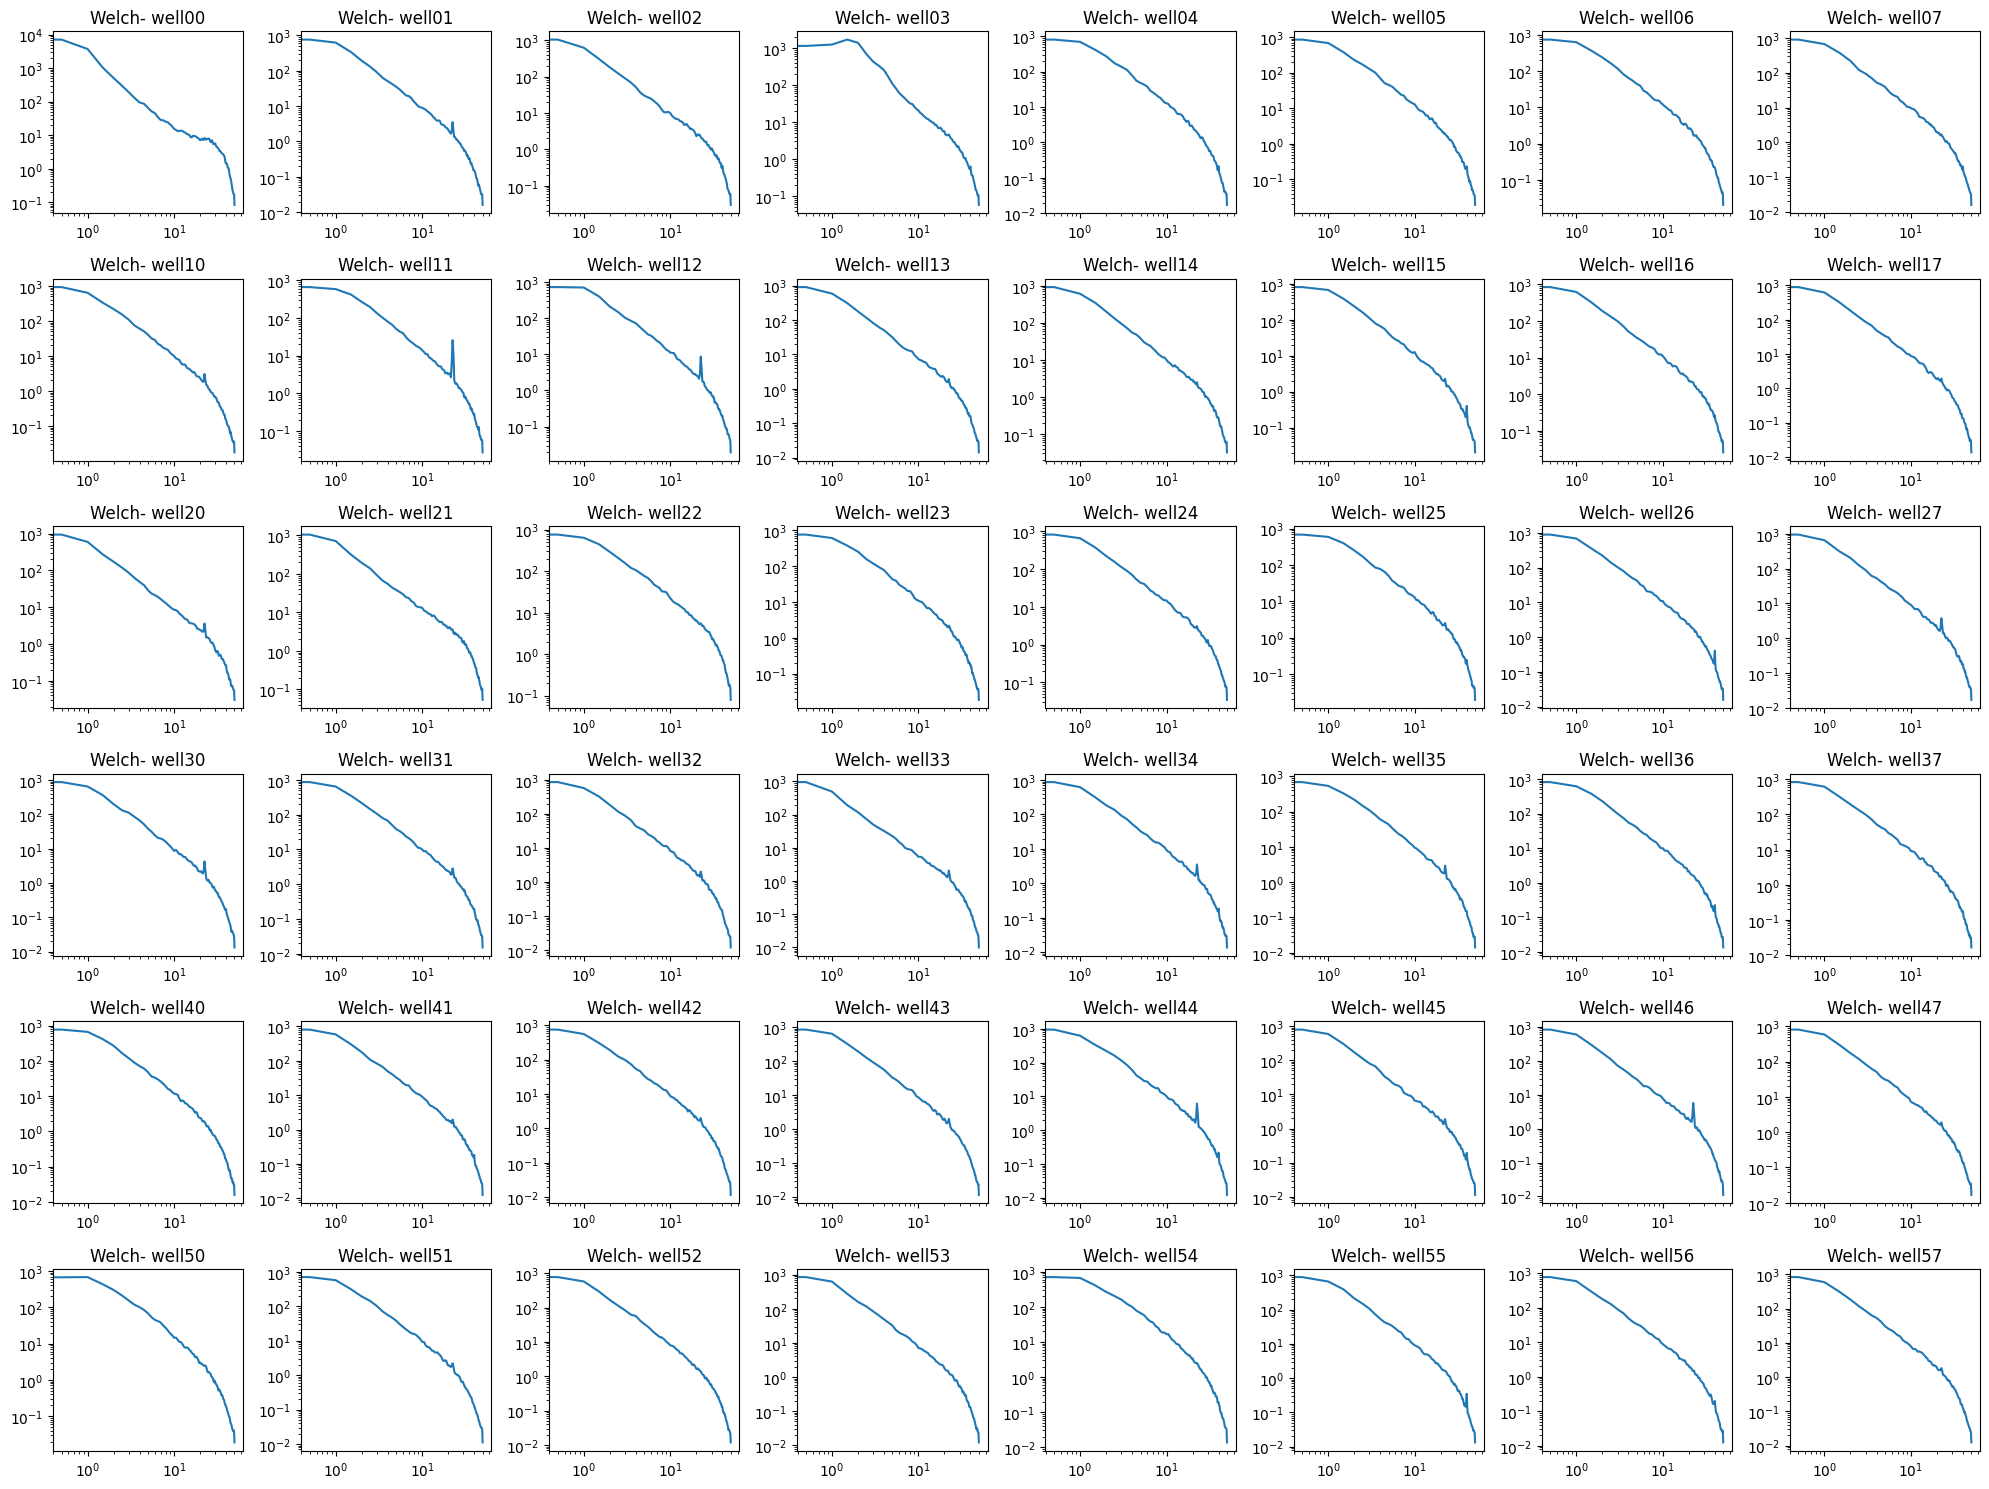

In [6]:
fig, axes = plt.subplots(6, 8, figsize=(20, 15))

for i in range(6):
    for j in range(8):
        sig = ds_wells_data[i][j]
        freq_mean, psd_mean = compute_spectrum(sig, fs_ds, method='welch', avg_type='mean', nperseg=fs_ds*2)

        ax = axes[i, j]
        
        # Plot the power spectrum on the subplot
        ax.plot(freq_mean, psd_mean)
        ax.set_title(f'Welch- well{i}{j}')
        ax.set_xscale('log')
        ax.set_yscale('log')


plt.tight_layout()
plt.show()

In [29]:
# Initialize a variable to store the maximum value found
max_middle_value = -np.inf

# Loop through the array starting from [3, 1]
for i in range(3, 6):
    for j in range(8):
        if i == 3 and j == 0:
            continue  # Skip the entry [3, 0]
        if i == 3 and j == 1:
            continue
        # Get the middle value (second element) from the aperiodic_params_ array
        print(fm_array[i, j].peak_params_)
        for arr in fm_array[i, j].peak_params_:
            middle_value = arr[1]
        # Update the max value if the current middle value is greater
        if middle_value > max_middle_value:
            max_middle_value = middle_value

print(f"The maximum middle value after [3, 1] is: {max_middle_value}")


[[24.88278771  0.38829867 10.85788099]
 [35.97878312  0.36868321  8.55301285]]
[[22.86424965  0.37678799  8.22906256]
 [34.21486809  0.38103763 10.61435162]]
[[22.53960196  0.67804058  0.65280312]
 [26.85831081  0.38793319 12.        ]
 [37.45907412  0.3196553   7.56499569]]
[[17.73718833  0.23819051  5.03074464]
 [22.60822124  0.61947896  0.63371353]
 [25.33646526  0.37928925  8.8356845 ]
 [34.44094351  0.36784575  7.4544159 ]
 [40.55105883  0.21765691  4.39992799]]
[[24.18741076  0.38330192 10.44512422]
 [34.92425931  0.36971091  9.48098743]
 [40.00026008  0.47109042  0.73928543]]
[[22.20137032  0.31131888  8.65449166]
 [32.4487582   0.37551632  8.86047979]
 [39.70198858  0.26284149  4.62124275]]
[[29.63545993  0.46313544 12.        ]]
[[23.15345473  0.34525322  8.01033861]
 [31.92122888  0.3491478   8.13800263]
 [36.37767969  0.33408742  1.27275456]
 [39.21202588  0.28821443  4.99659603]]
[[24.55983979  0.36426781 10.37883926]
 [35.5534182   0.36106268  8.98516612]]
[[18.04751213  0


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 50 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset,

C:\Python312\Lib\site-packages\fooof\plts\utils.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 50 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     4.7898, 875.9075, 3.3242                                     
                                                                                                  
                                       0 peaks were found:                                        
          

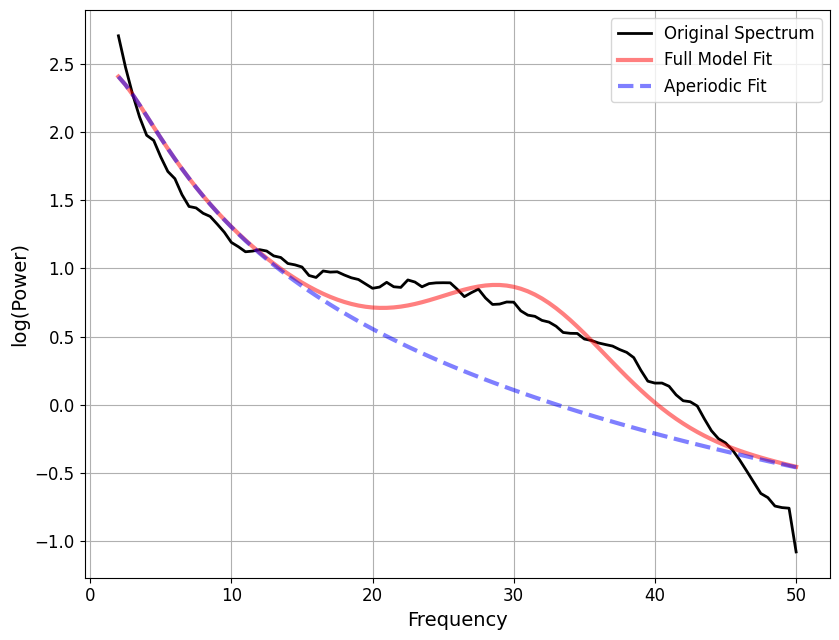

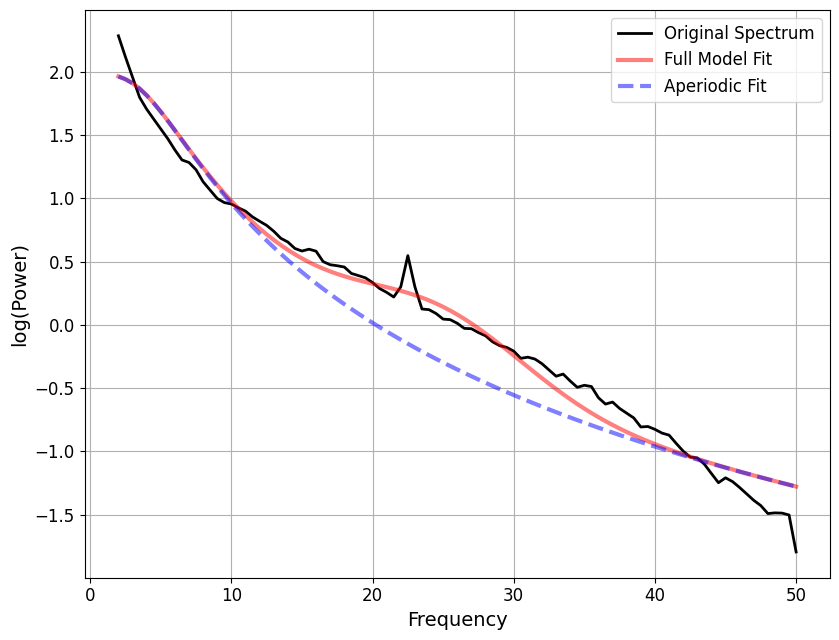

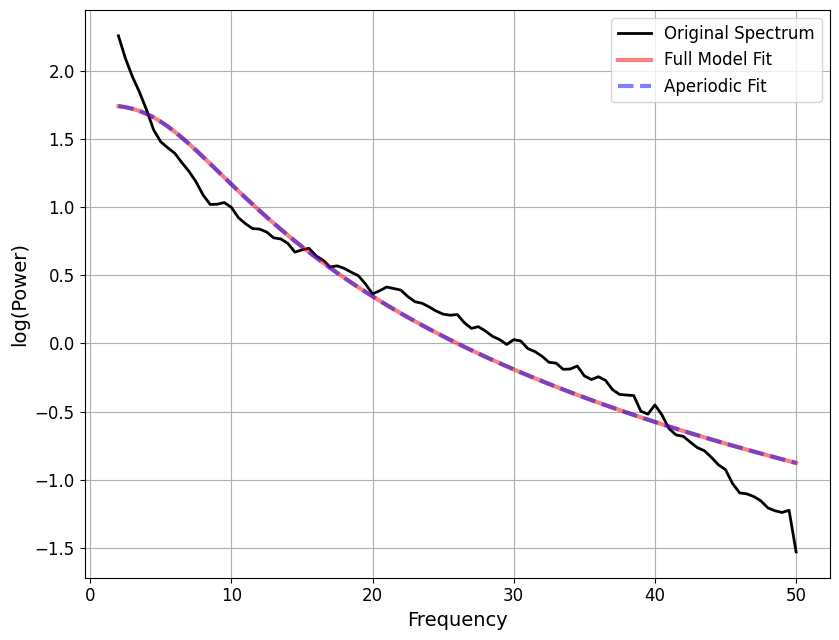

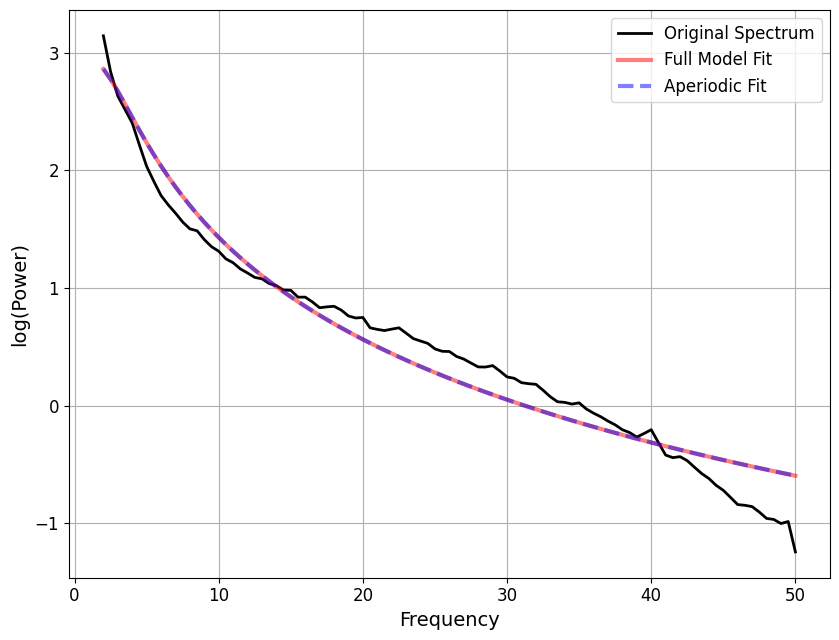

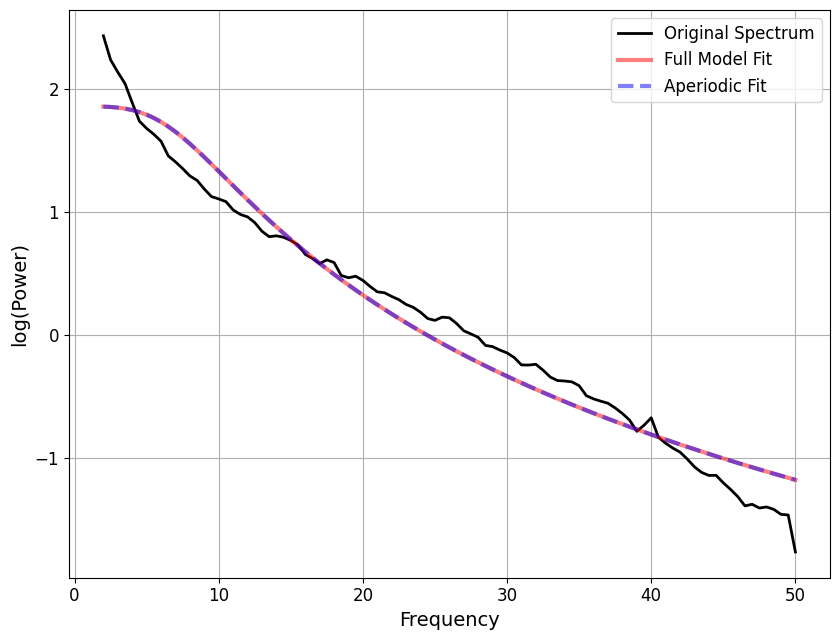

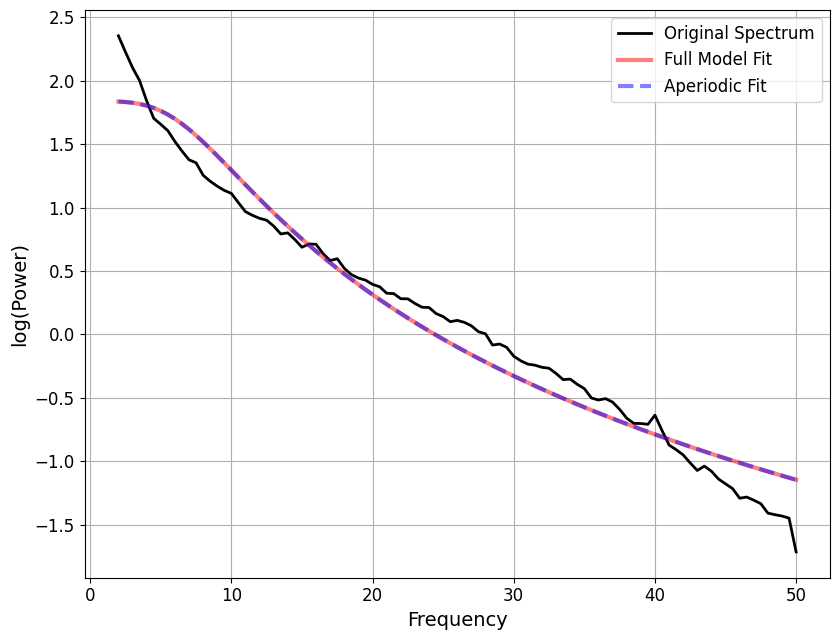

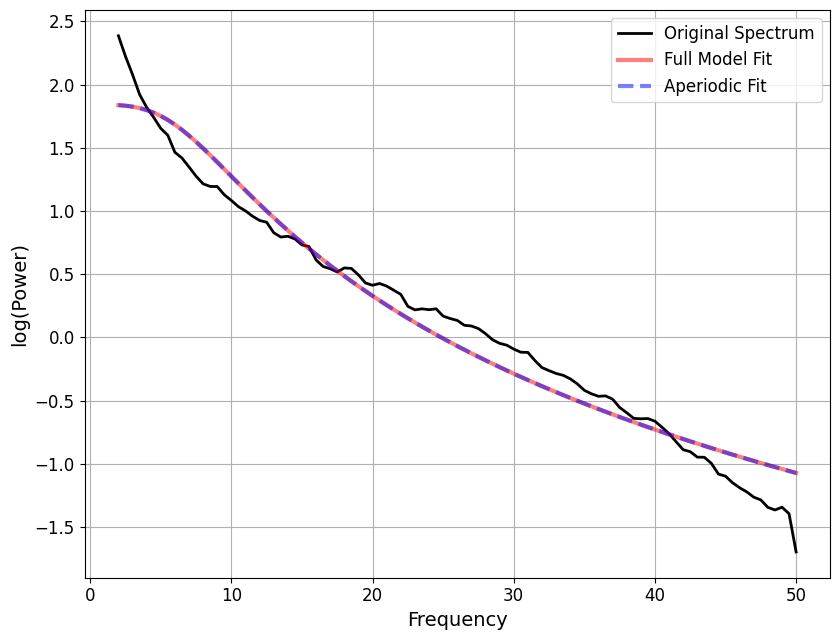

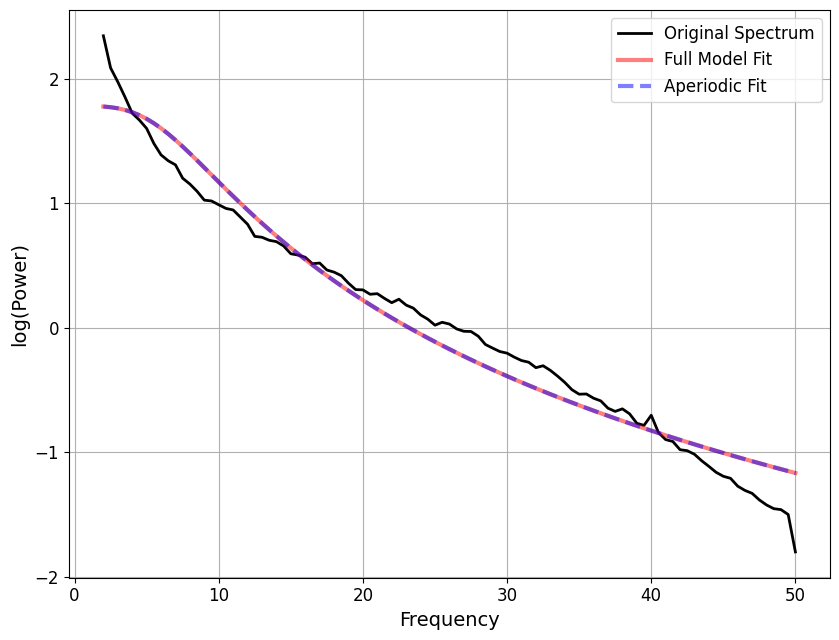

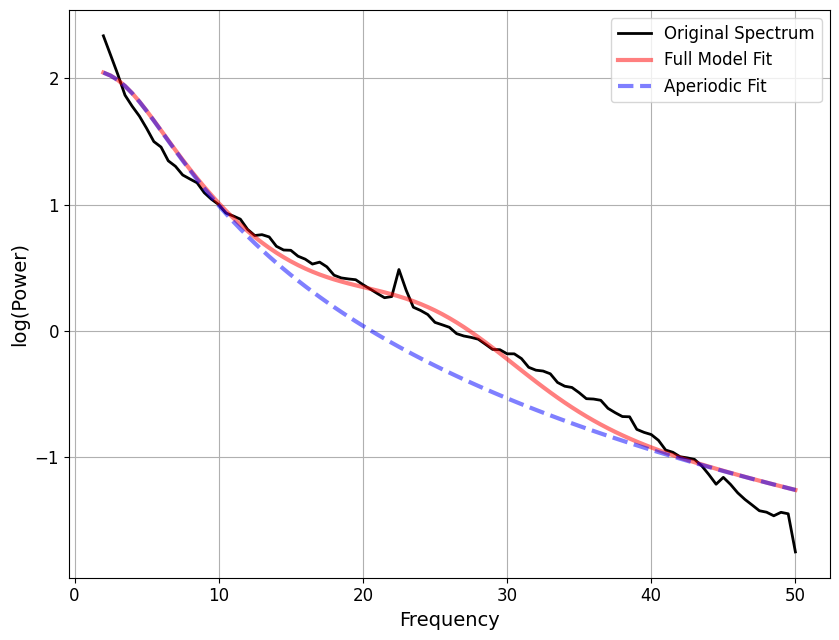

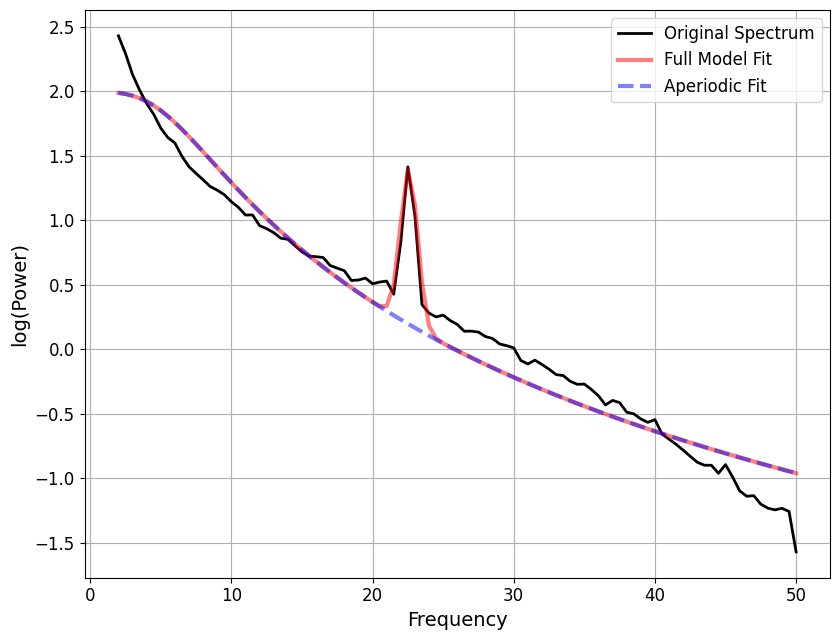

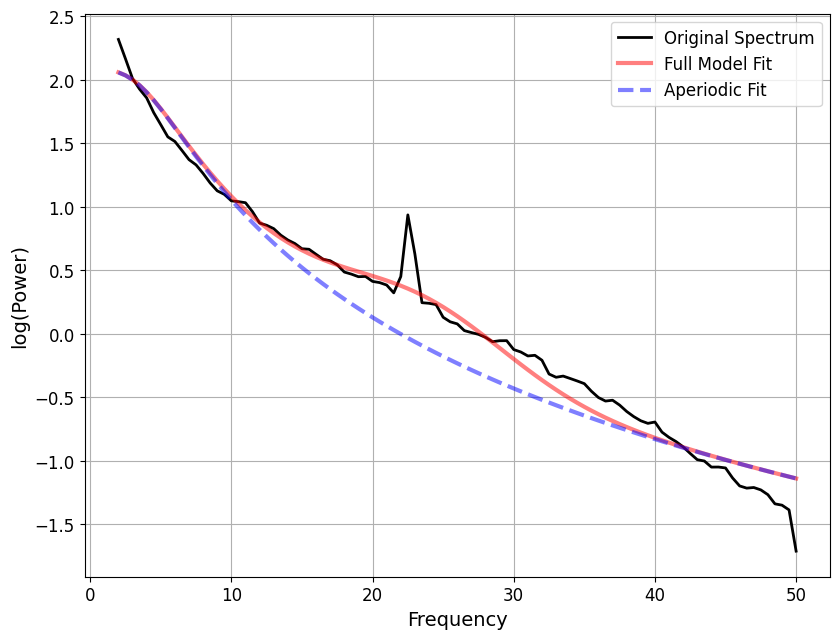

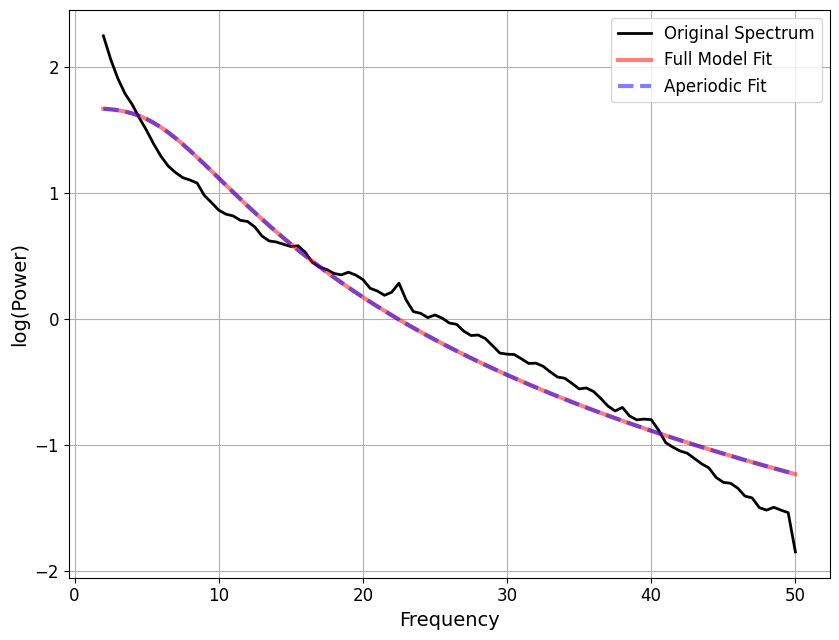

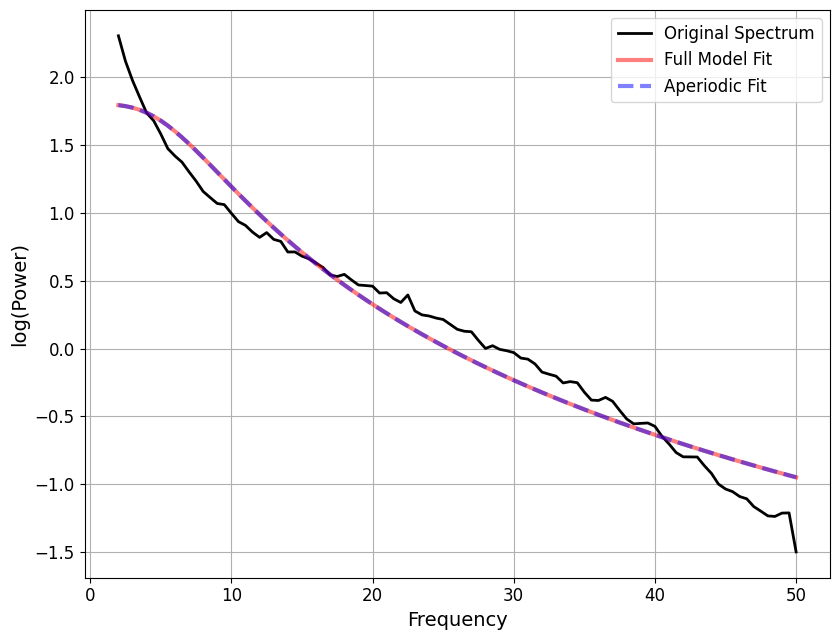

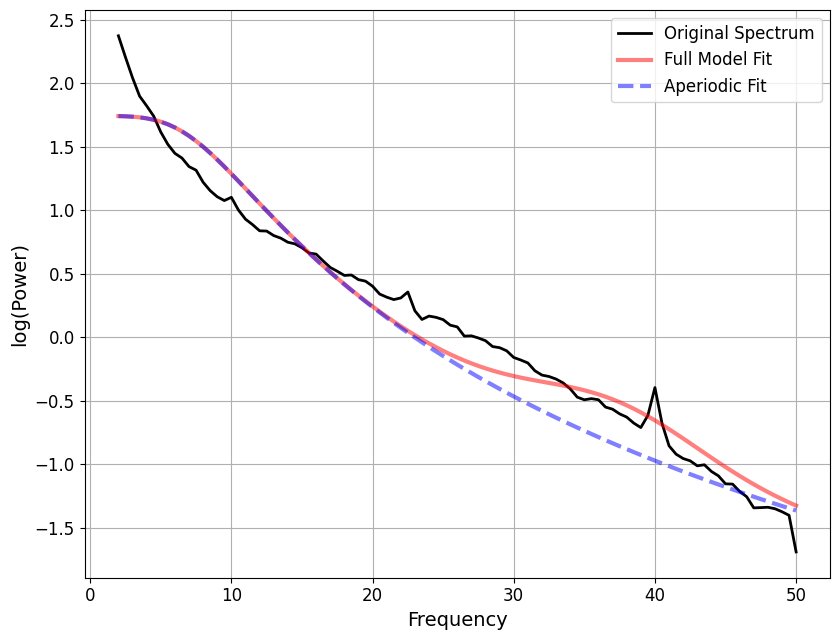

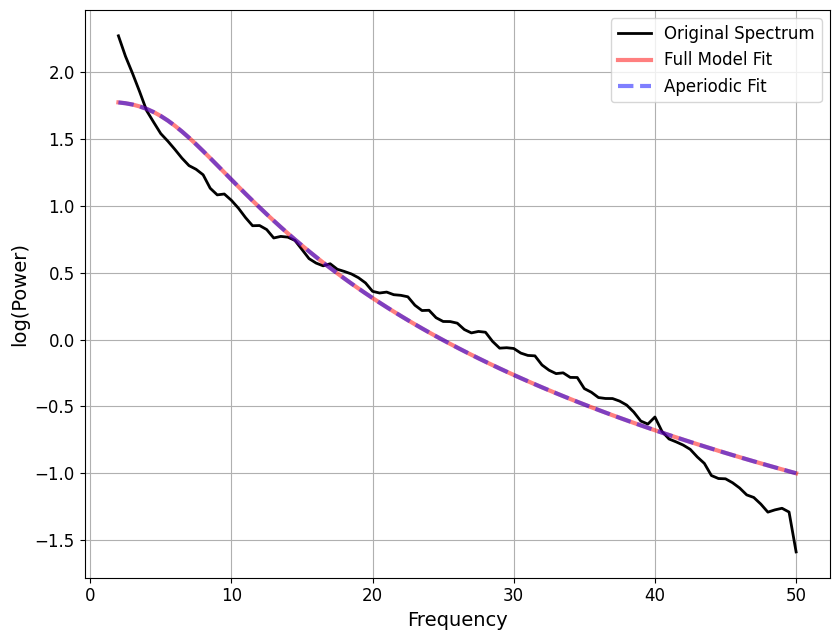

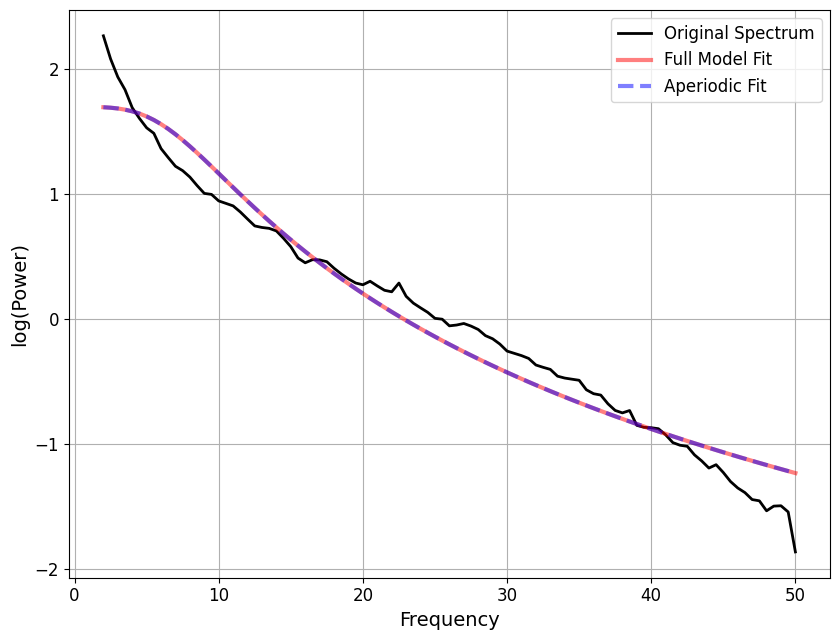

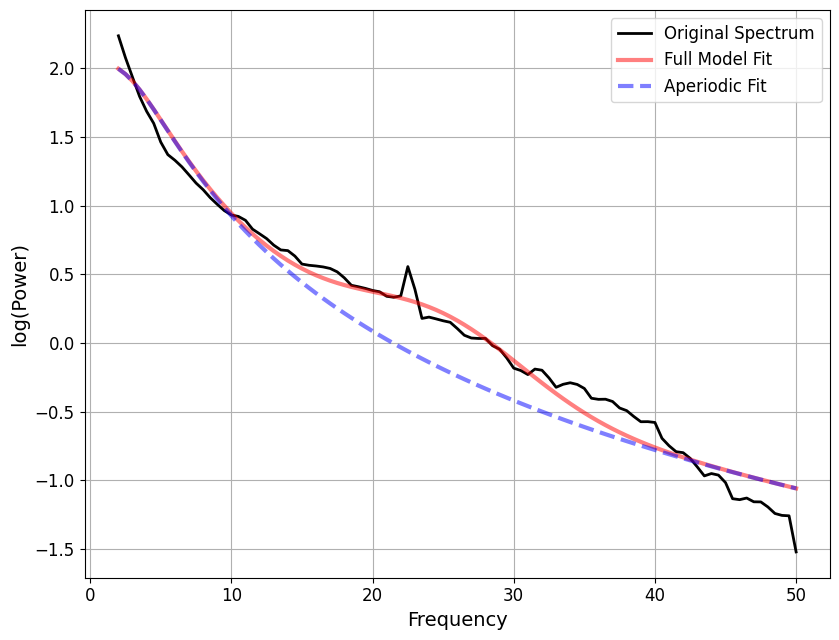

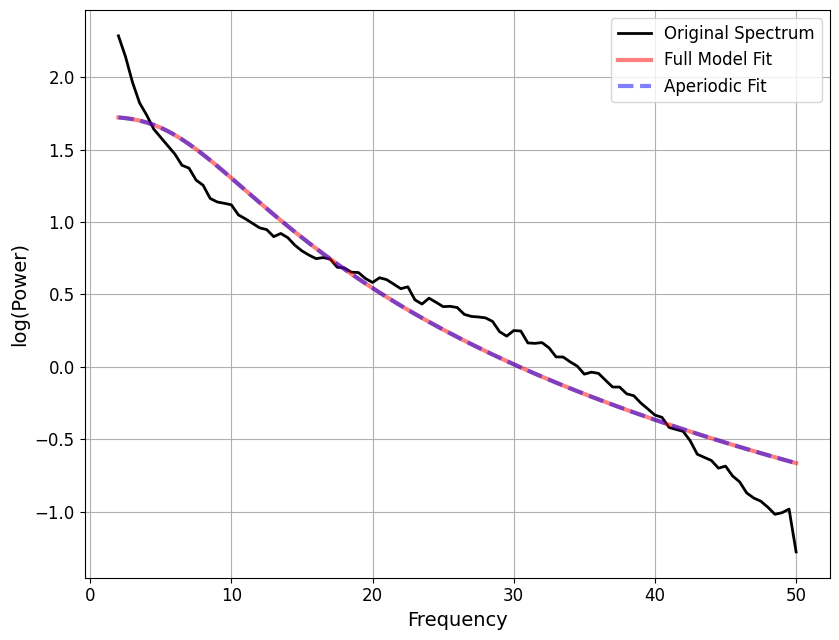

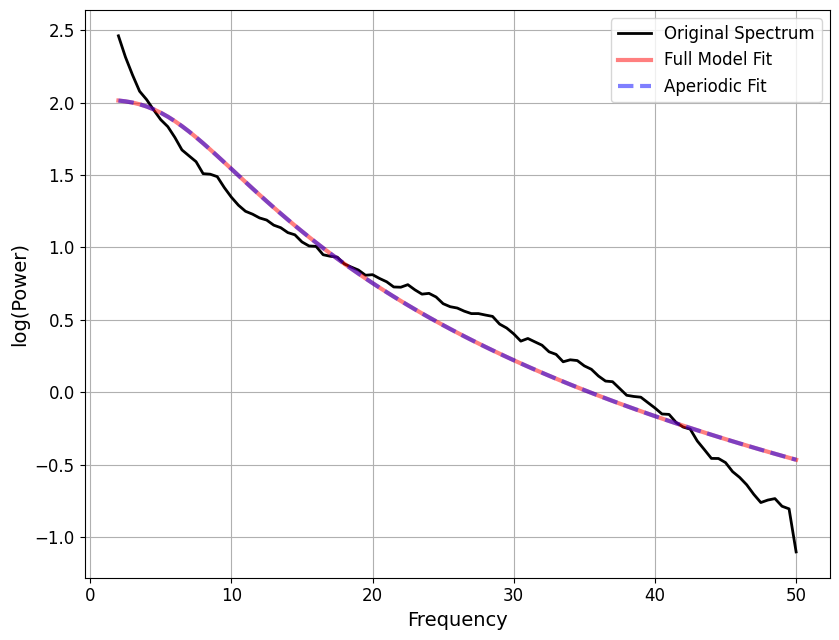

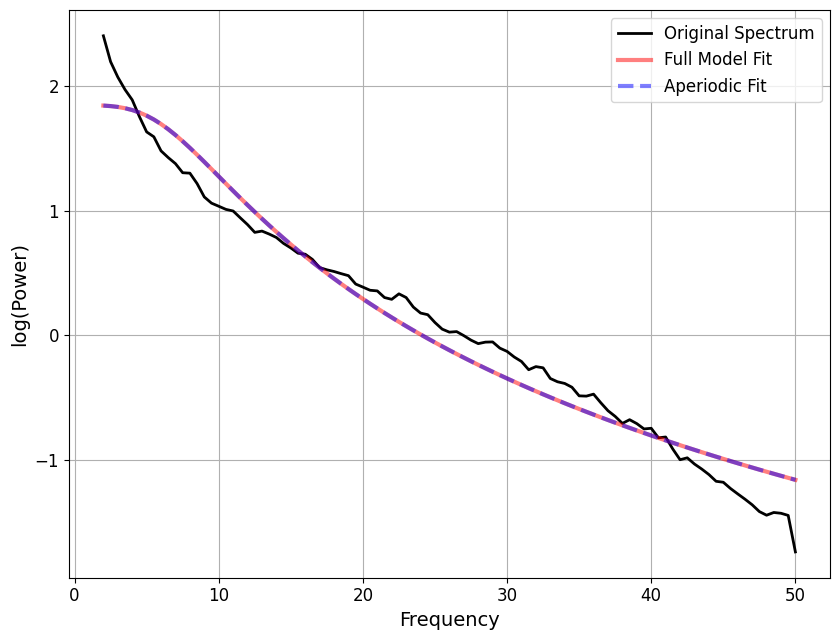

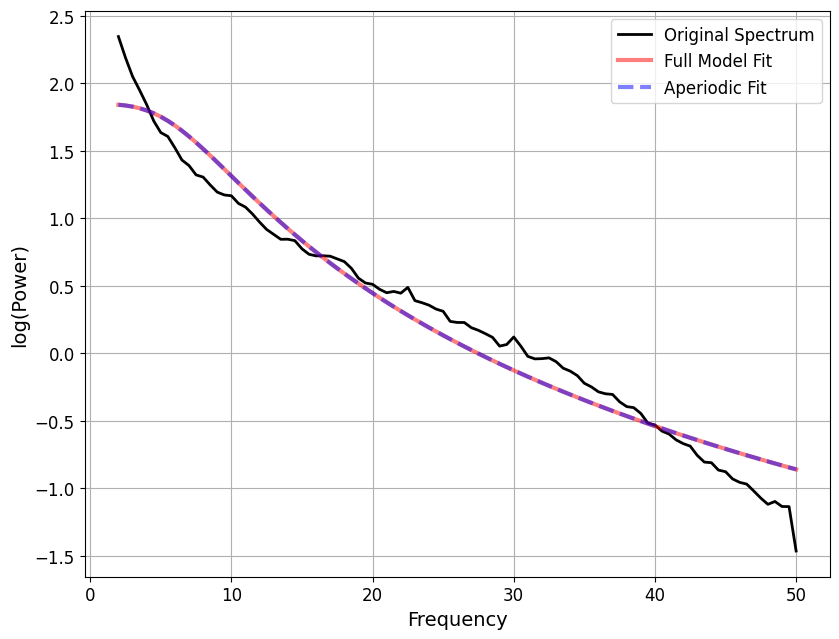

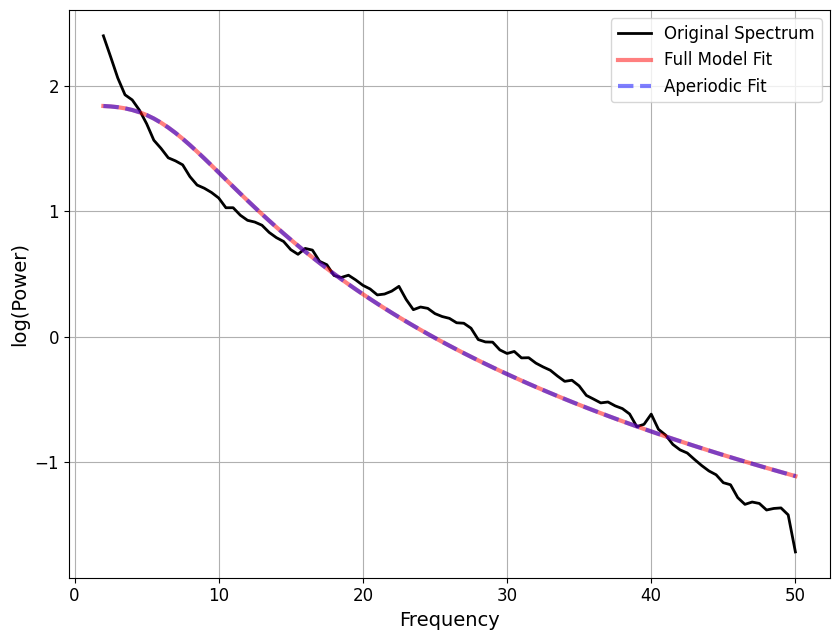

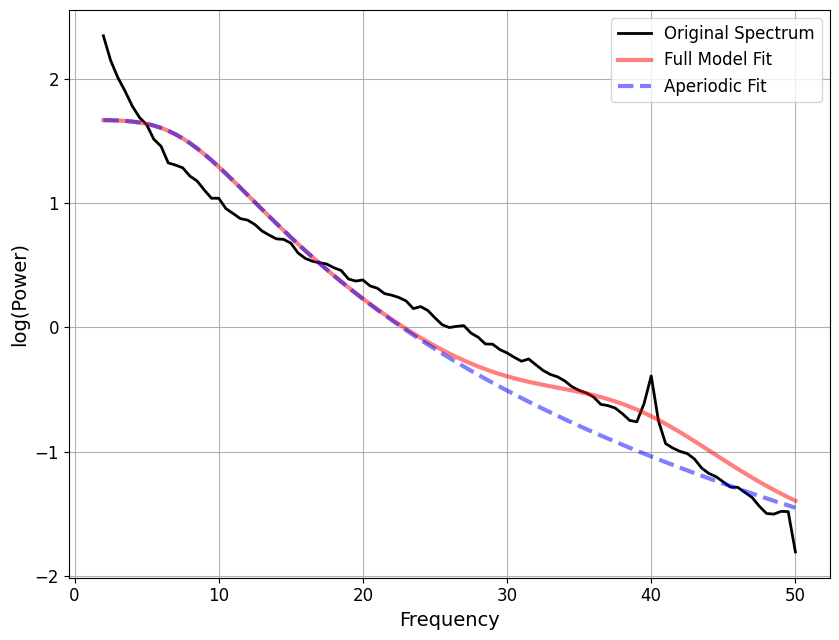

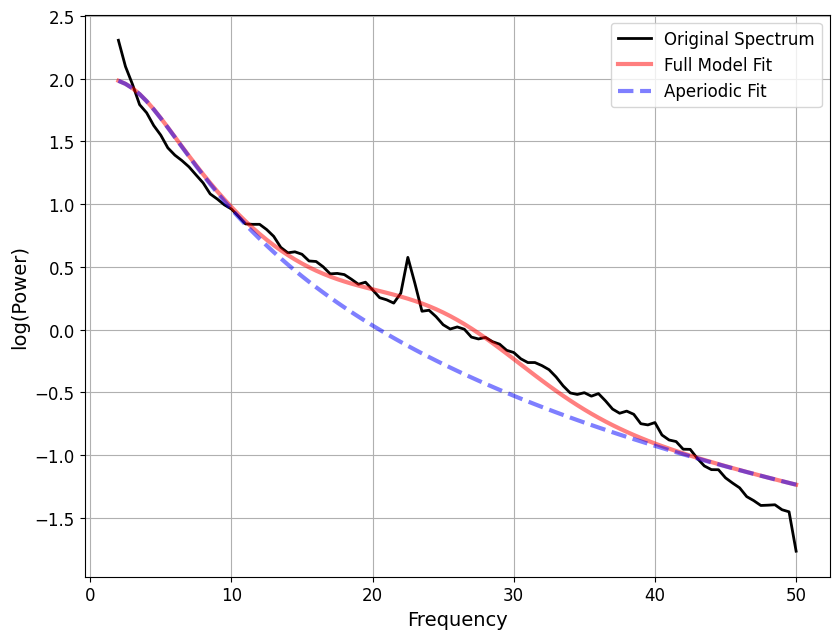

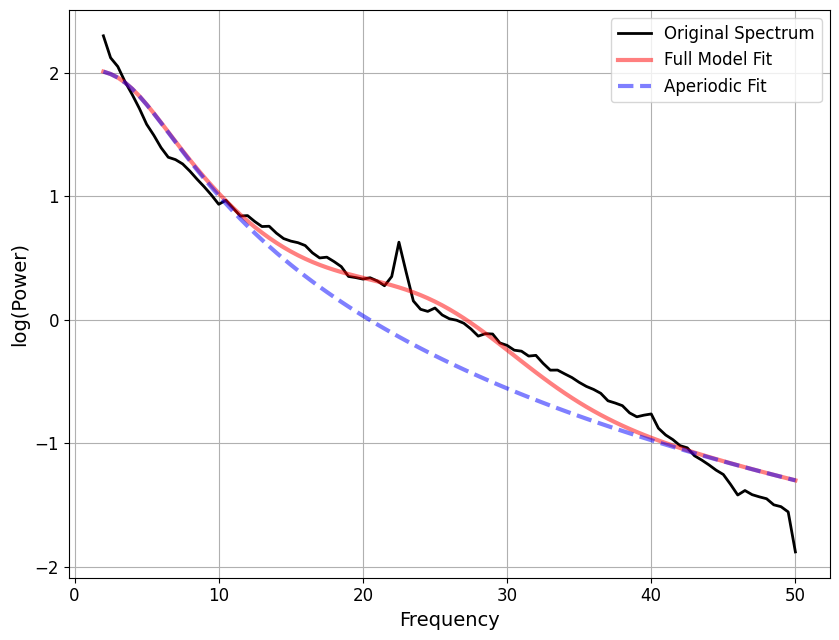

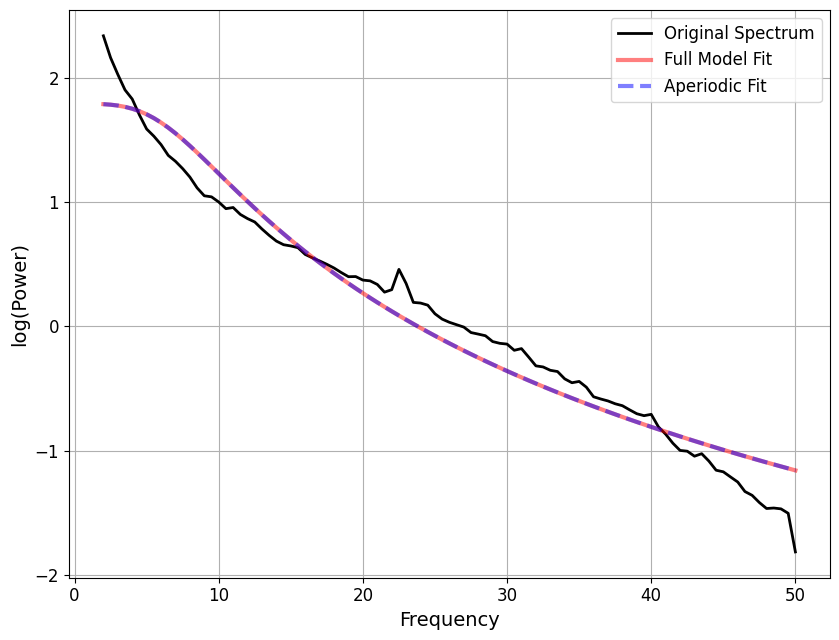

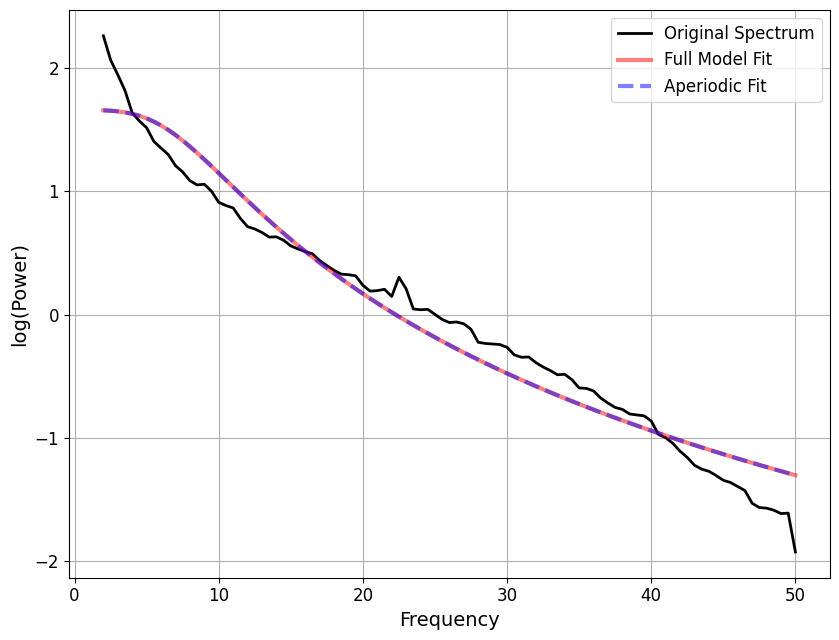

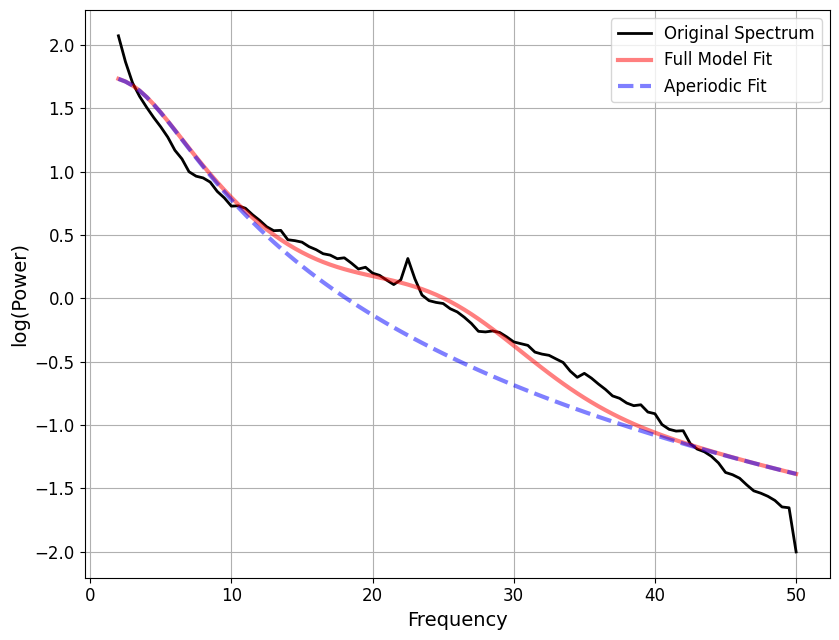

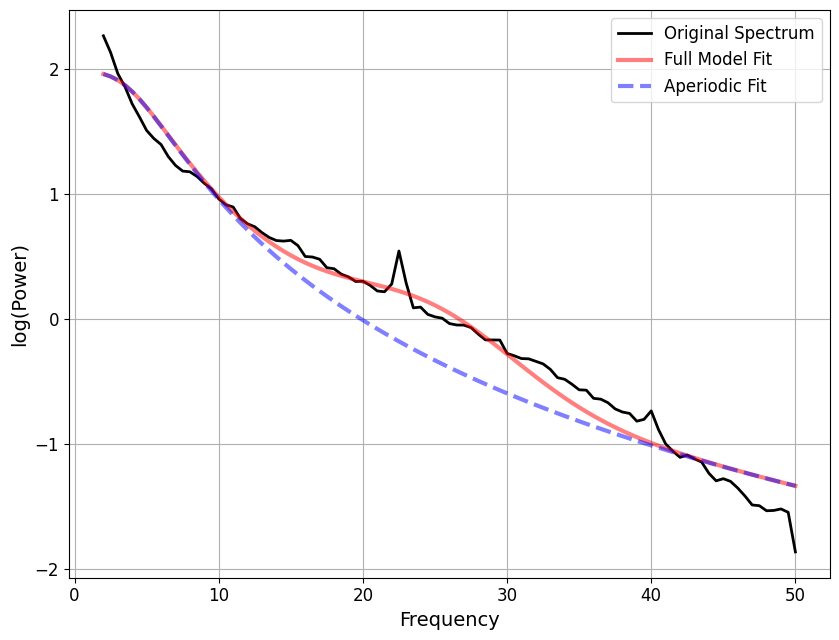

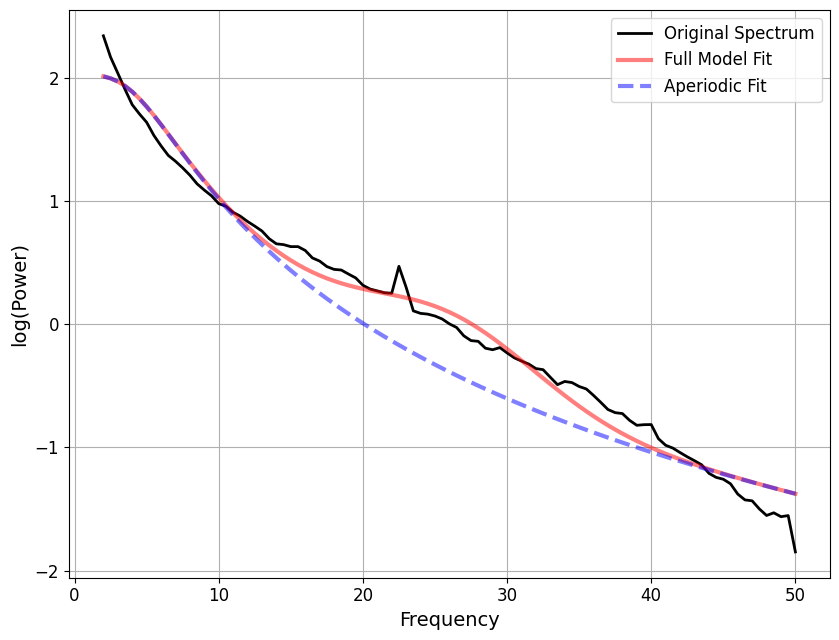

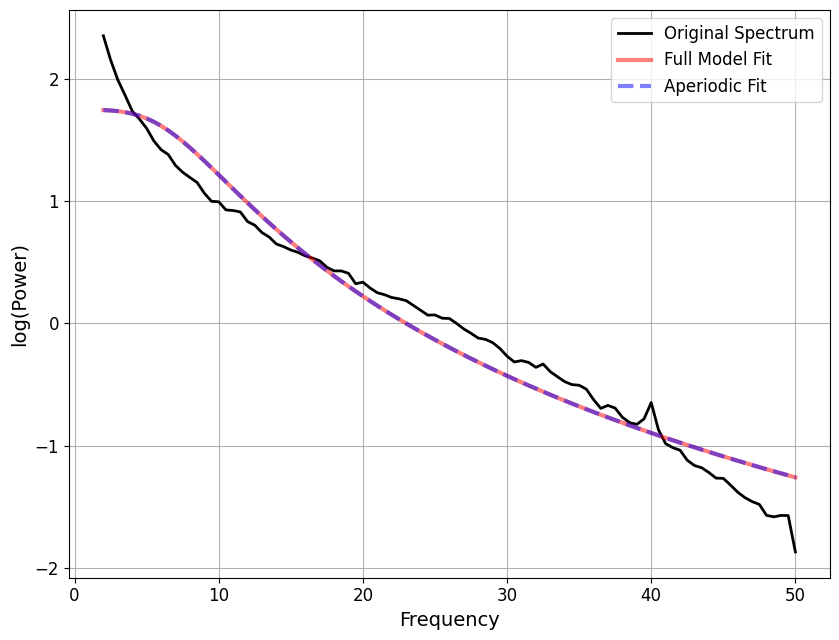

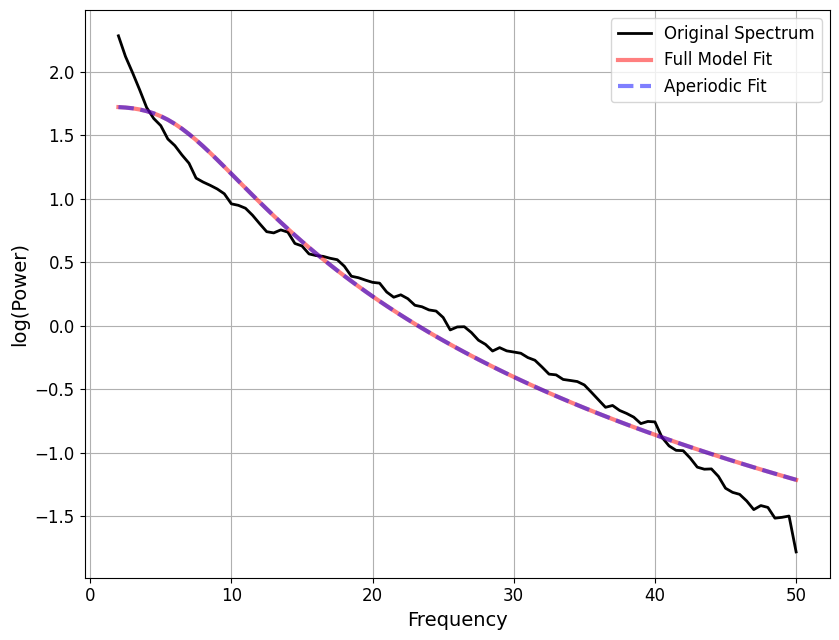

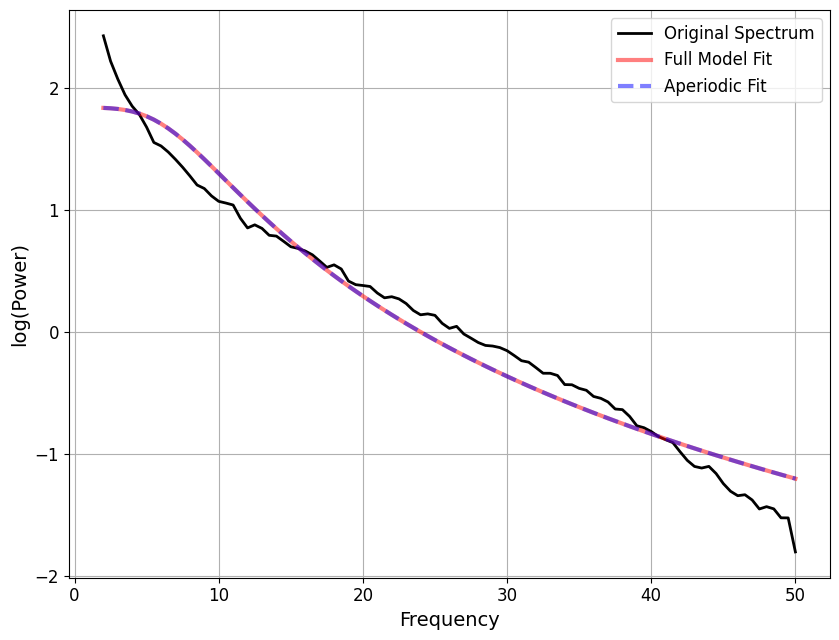

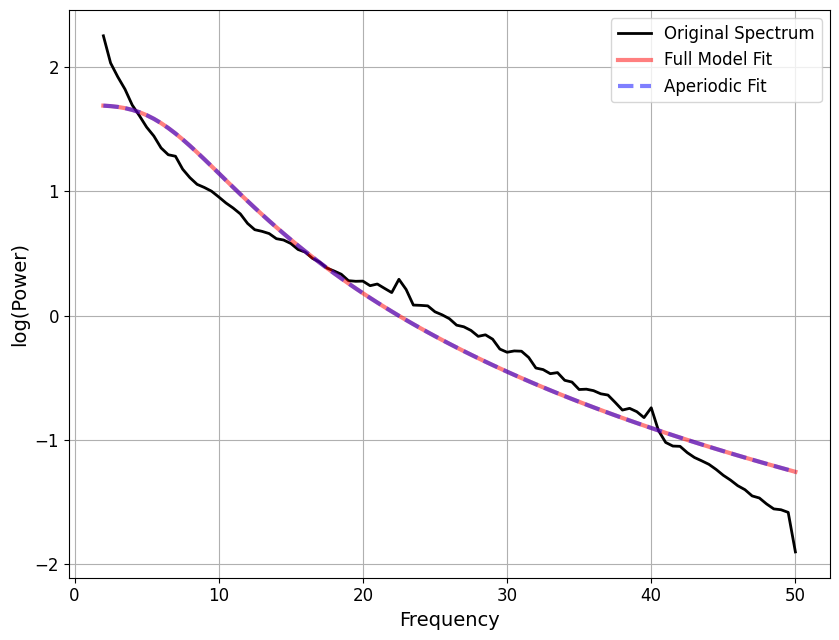

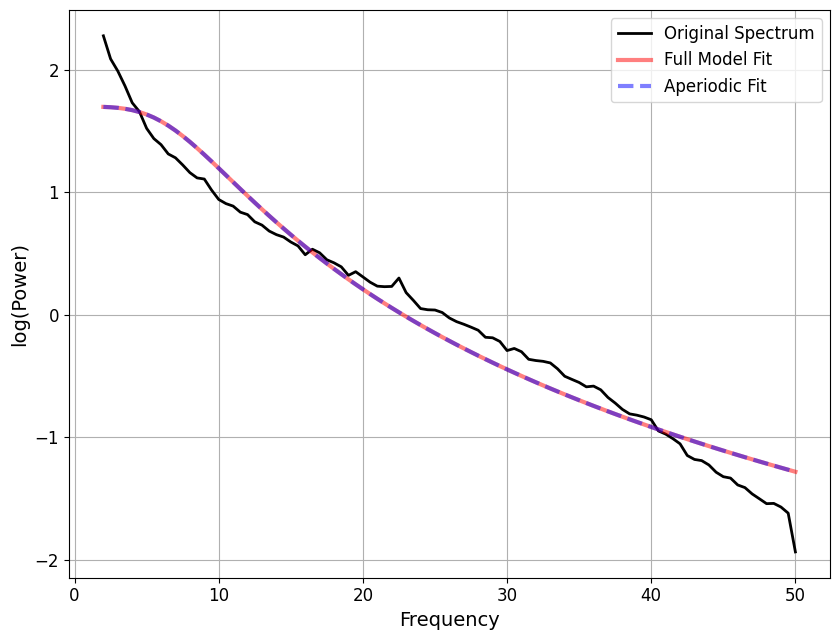

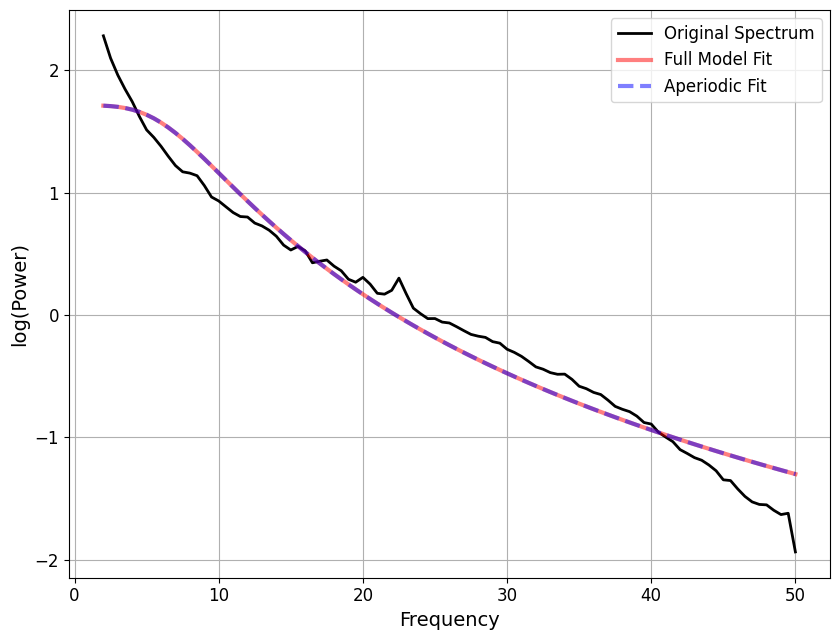

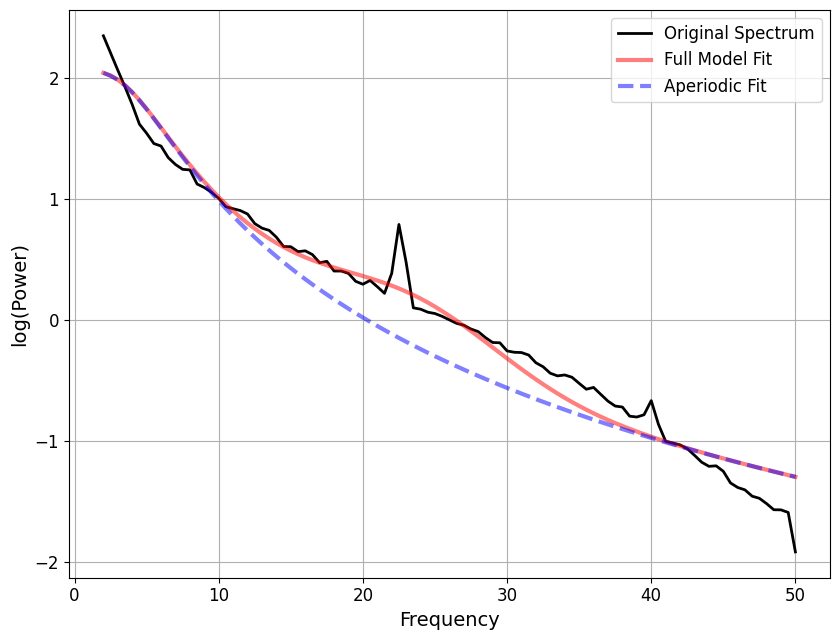

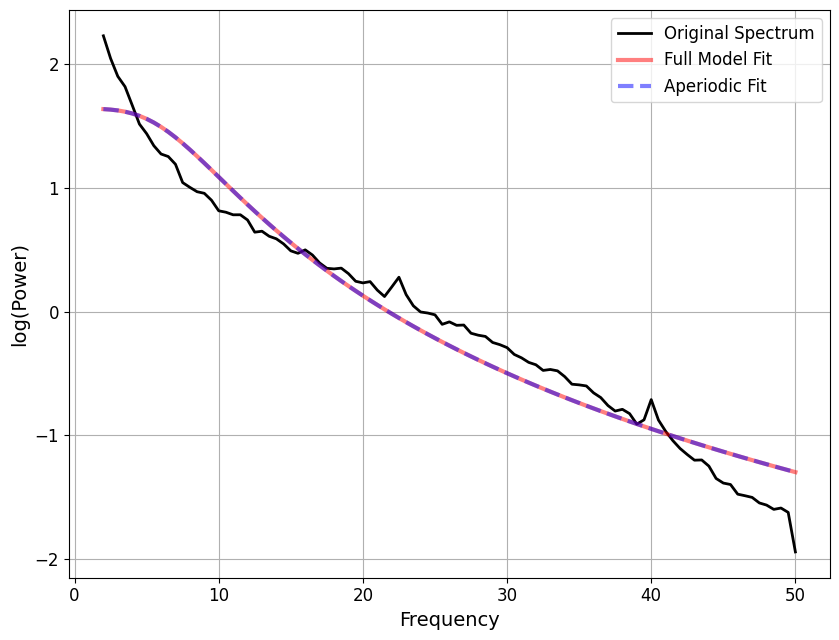

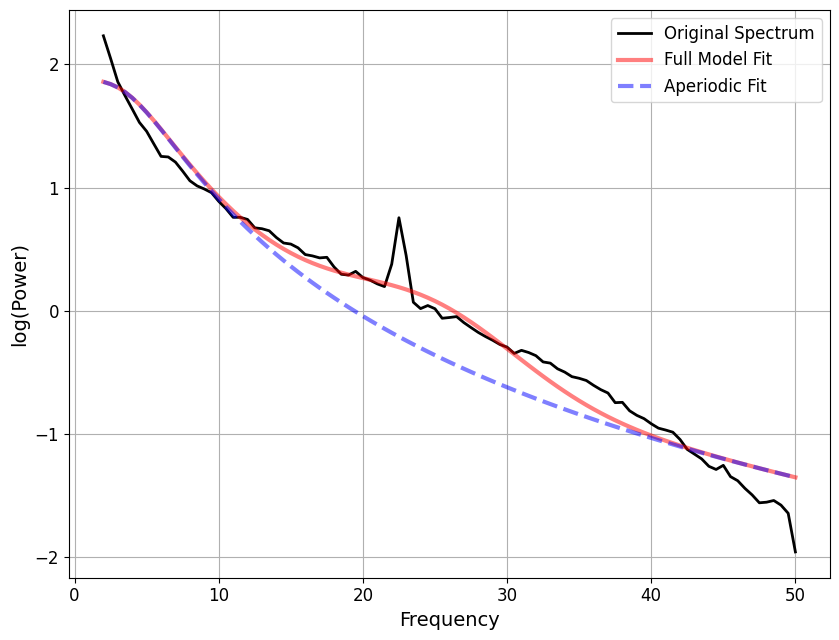

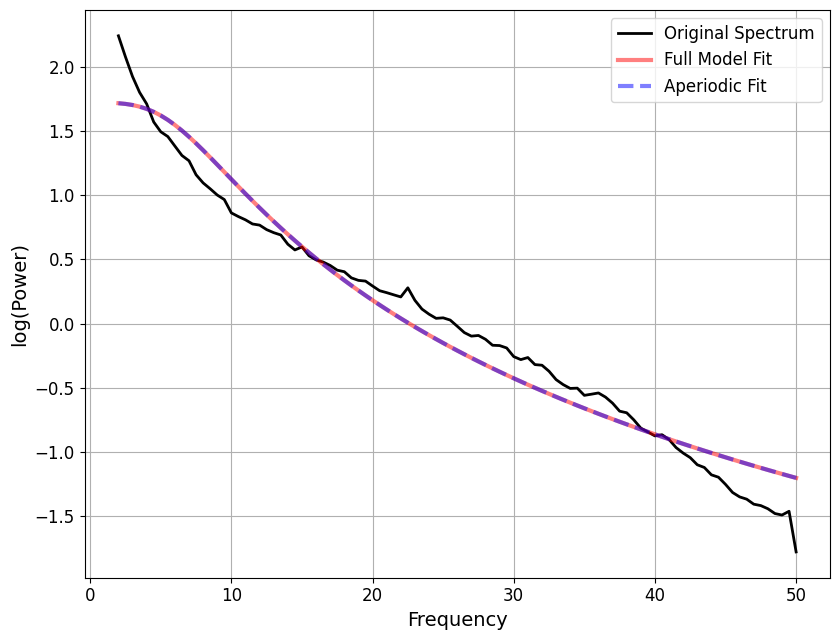

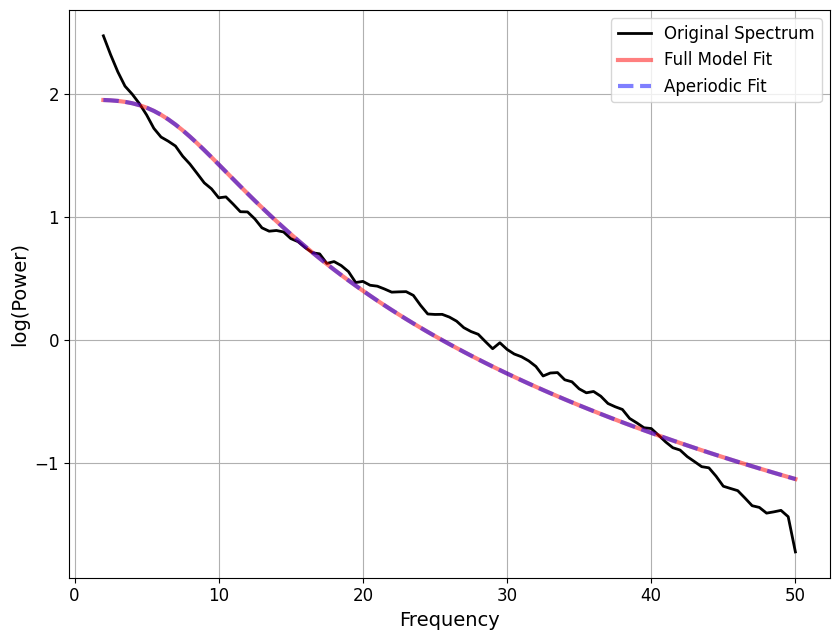

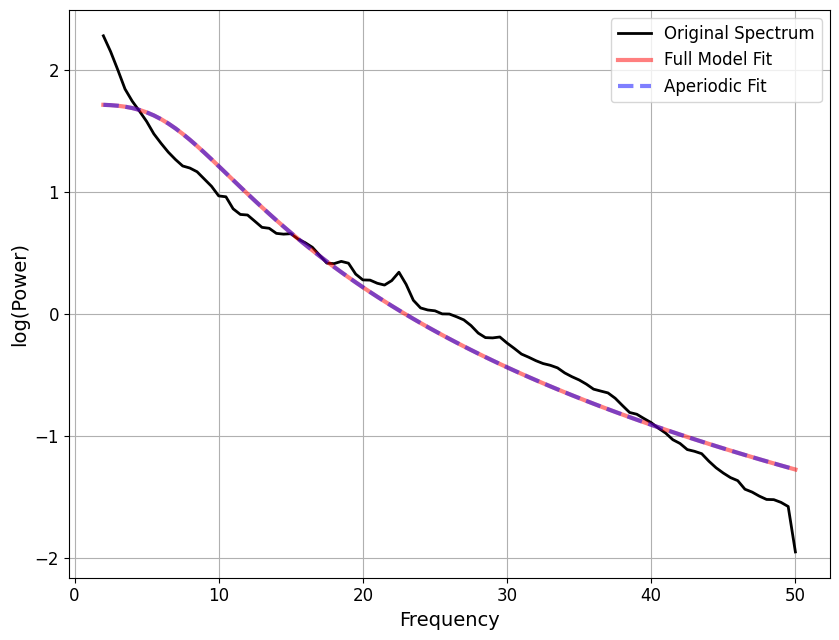

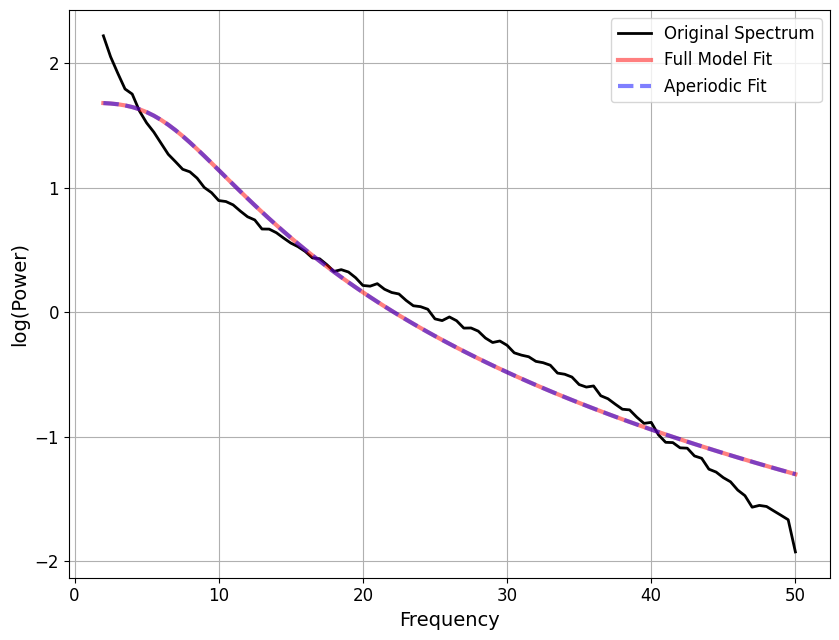

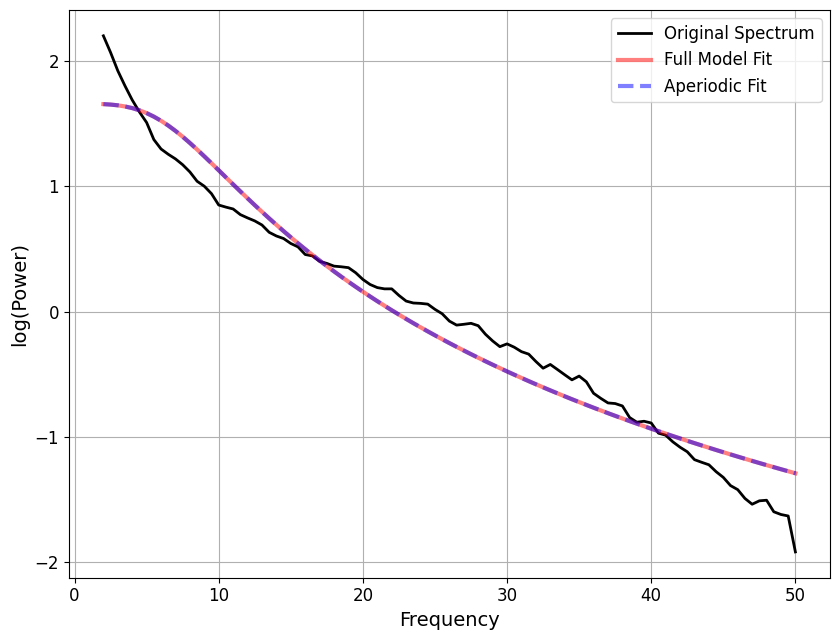

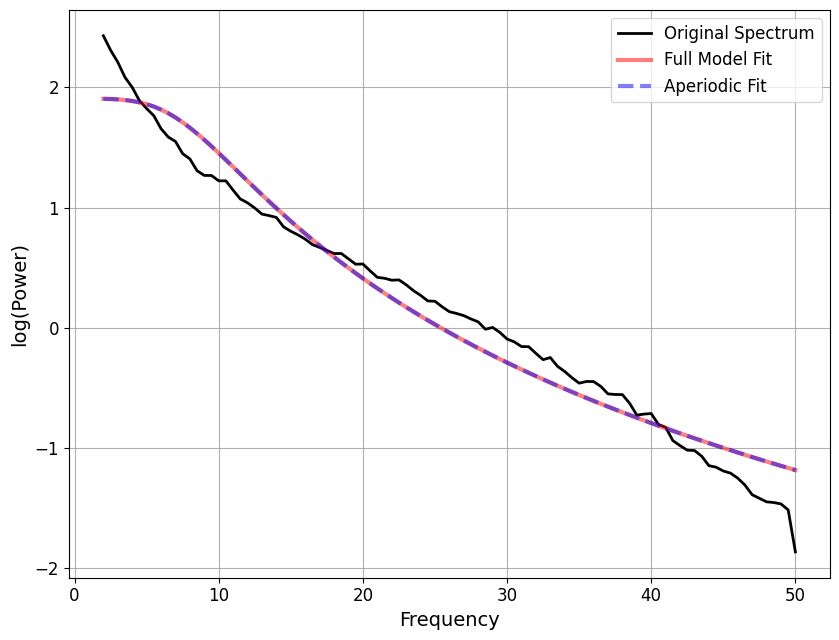

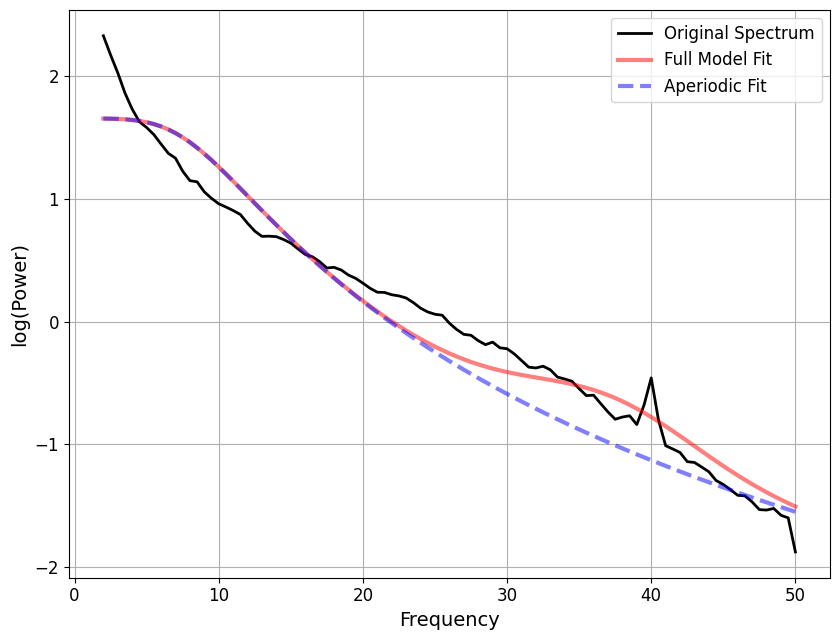

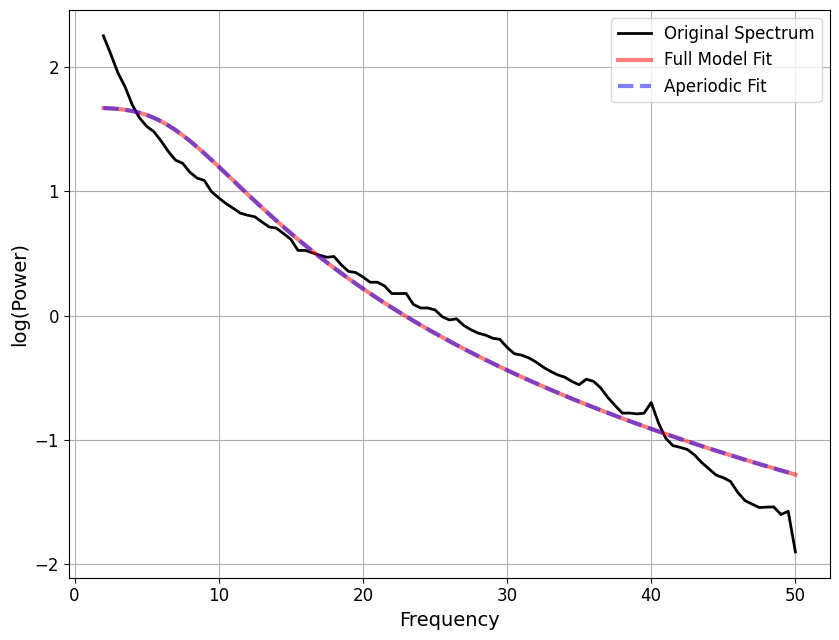

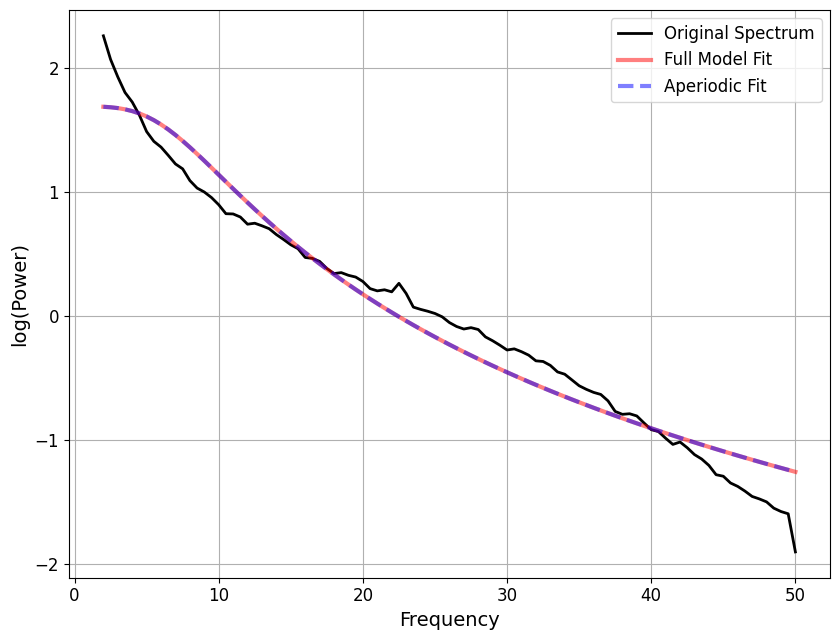

In [30]:
fm_array = np.empty((6, 8), dtype=object)
for i in range(6):
    for j in range(8):
        sig = ds_wells_data[i][j]
        freq_mean, psd_mean = compute_spectrum(sig, fs_ds, method='welch', avg_type='mean', nperseg=fs_ds*2)
        # Initialize a FOOOF object
        fm = FOOOF(min_peak_height=0.5316, aperiodic_mode = "knee")
        fm_array[i, j] = fm
        # Set the frequency range to fit the model
        freq_range = [2, 50]
        
        # Report: fit the model, print the resulting parameters, and plot the reconstruction
        fm.report(freq_mean, psd_mean, freq_range)

In [24]:
fm_array[0, 3].aperiodic_params_  #pre adjustment

array([ 4.30093996, 10.76736284,  3.05243726])

In [31]:
fm_array[0, 3].aperiodic_params_ #post

array([ 4.35575663, 23.77644513,  2.91362845])

In [25]:
fm_array[0, 3].peak_params_   

array([[20.63106783,  0.39685233, 10.01975472],
       [31.3831182 ,  0.44525076,  9.87941907],
       [39.65589761,  0.30889281,  5.22756381]])

In [32]:
fm_array[0, 3].peak_params_

array([], shape=(0, 3), dtype=float64)

In [33]:
def ds_power_windows(window_time):
    curr = 0
    inc = window_time
    fs_ds = 100
    while curr + inc < 60000:
        sig = ds_wells_data[0][3][curr:curr+inc]               #change well with new function param (using 0,3 because of activity)
        curr = curr + inc
        freq_mean, psd_mean = compute_spectrum(sig, fs_ds, method='welch', avg_type='mean', nperseg=fs_ds*2)
        plot_power_spectra([freq_mean[:]], [psd_mean[:]], [f'Welch- wellA4 {curr} - {curr + inc}'])

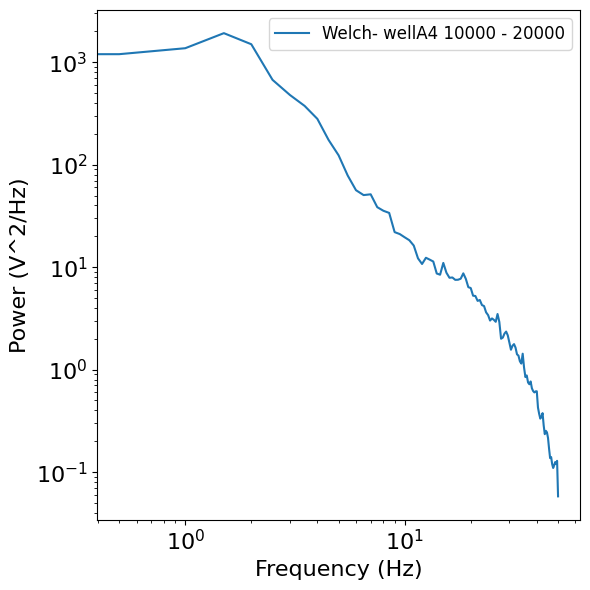

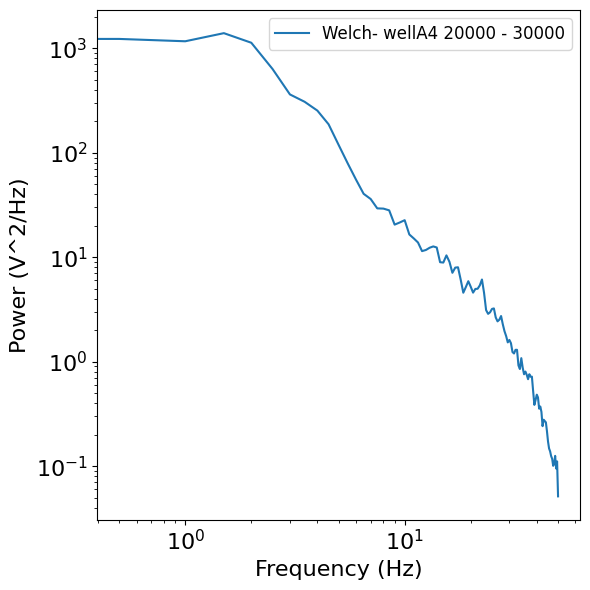

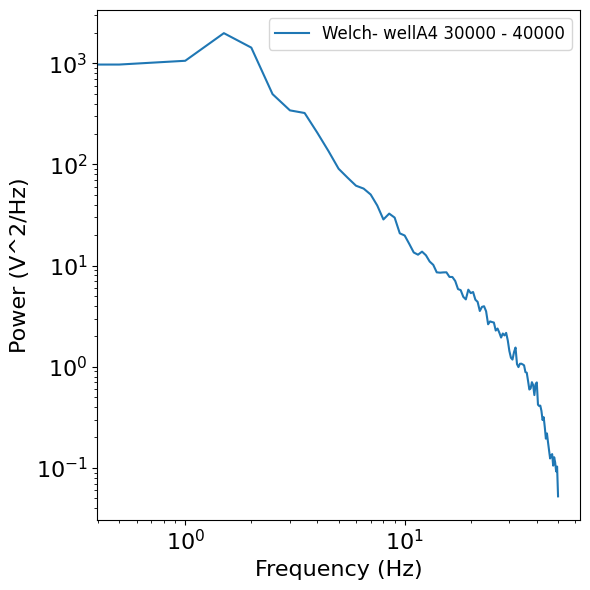

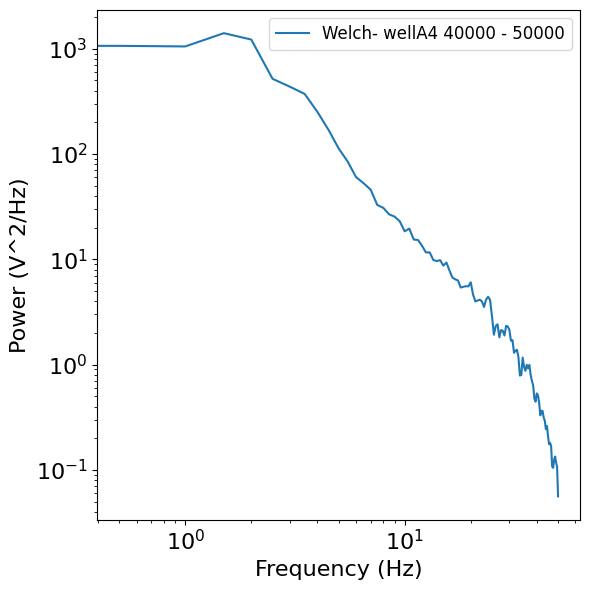

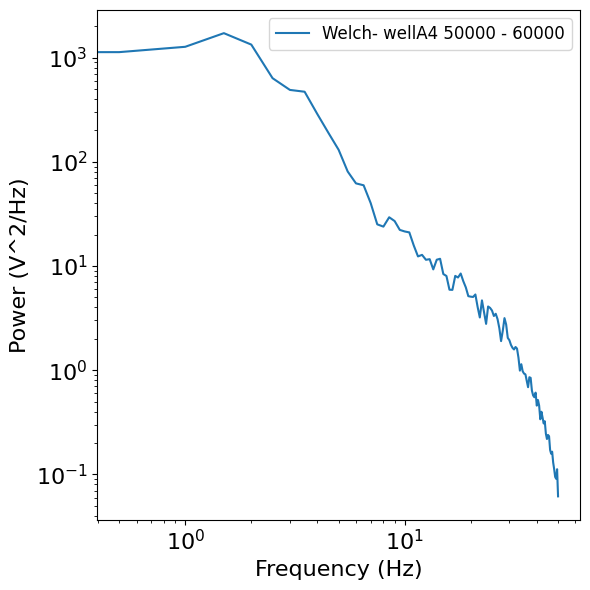

In [34]:
ds_power_windows(10000)

In [36]:
def fooof_on_windows(window_time):
    curr = 0
    inc = window_time
    fs_ds = 100
    while curr + inc < 60000:
        sig = ds_wells_data[0][3][curr:curr+inc]               #change well with new function param (using 0,3 because of activity)
        curr += inc
        freq_mean, psd_mean = compute_spectrum(sig, fs_ds, method='welch', avg_type='mean', nperseg=fs_ds*2)

        fm = FOOOF(min_peak_height=0.5316, aperiodic_mode = "knee")
        freq_range = [1, 50]
        fm.report(freq_mean, psd_mean, freq_range)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 50 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

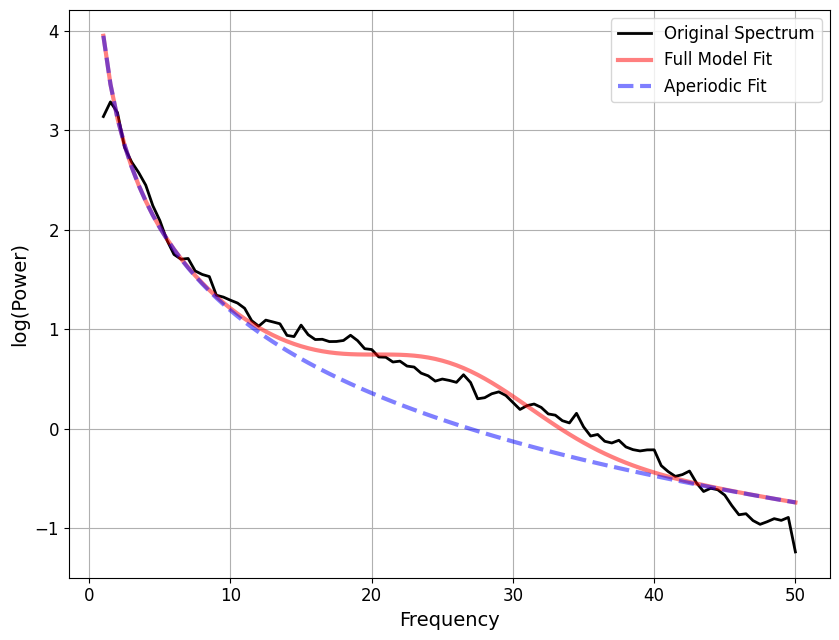

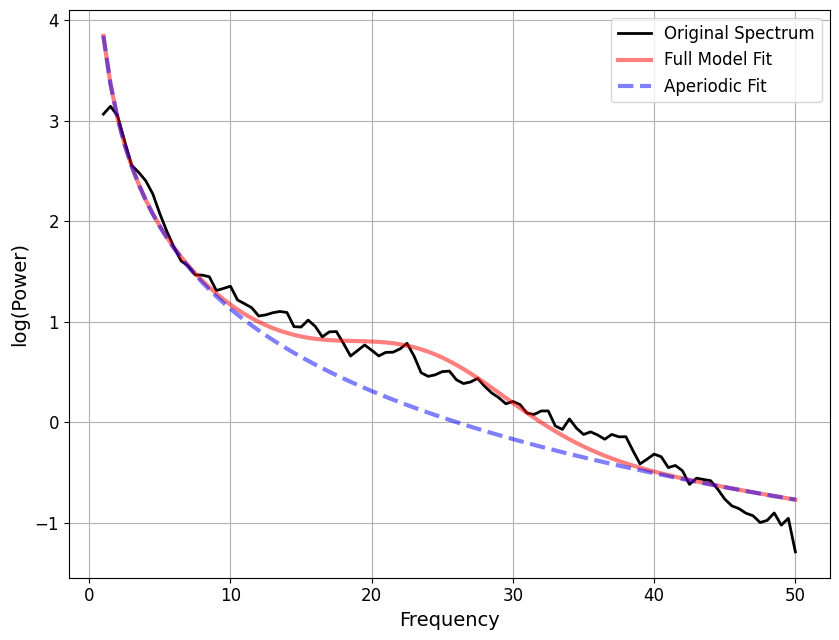

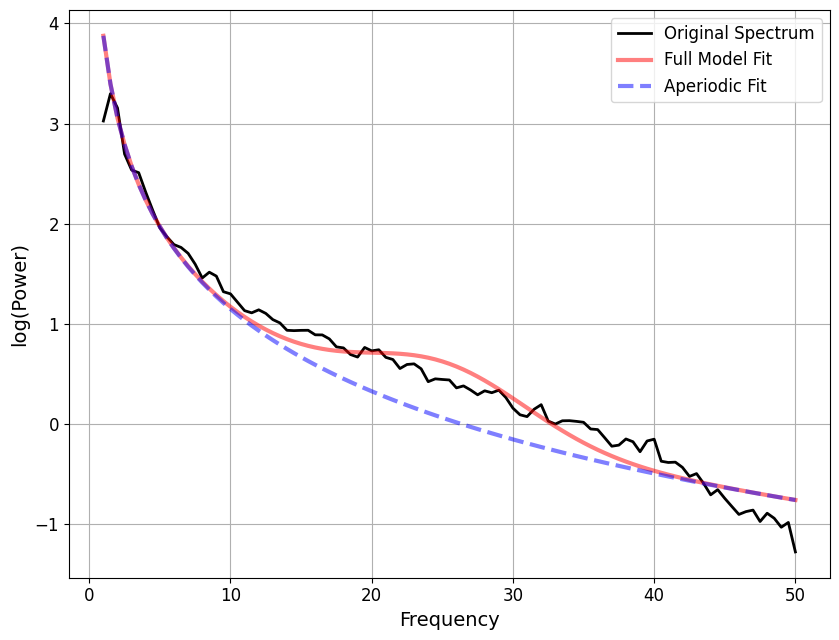

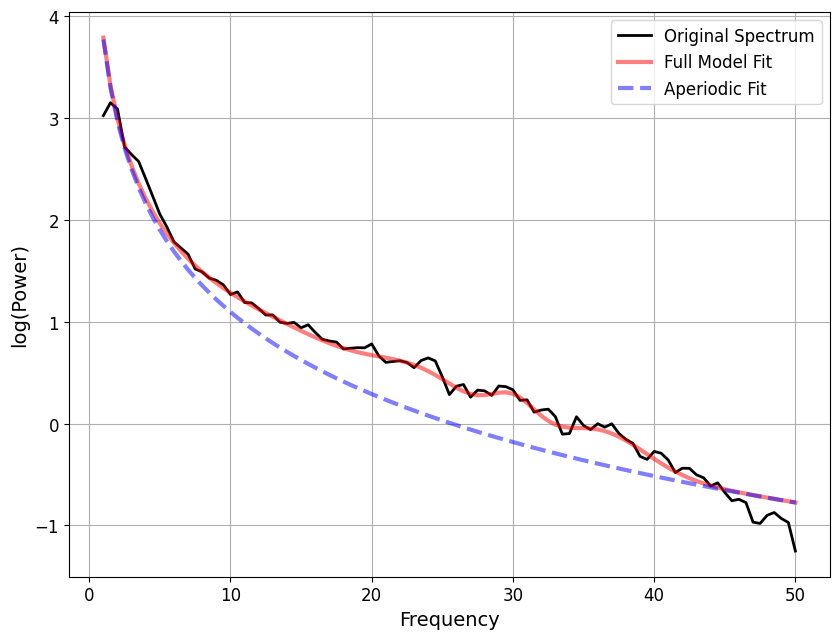

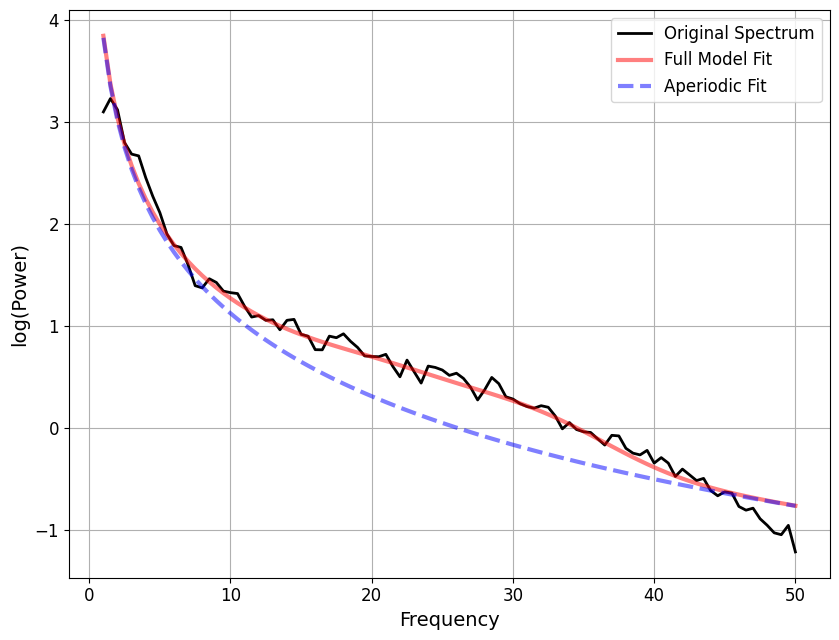

In [12]:
fooof_on_windows(10000)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 50 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset,

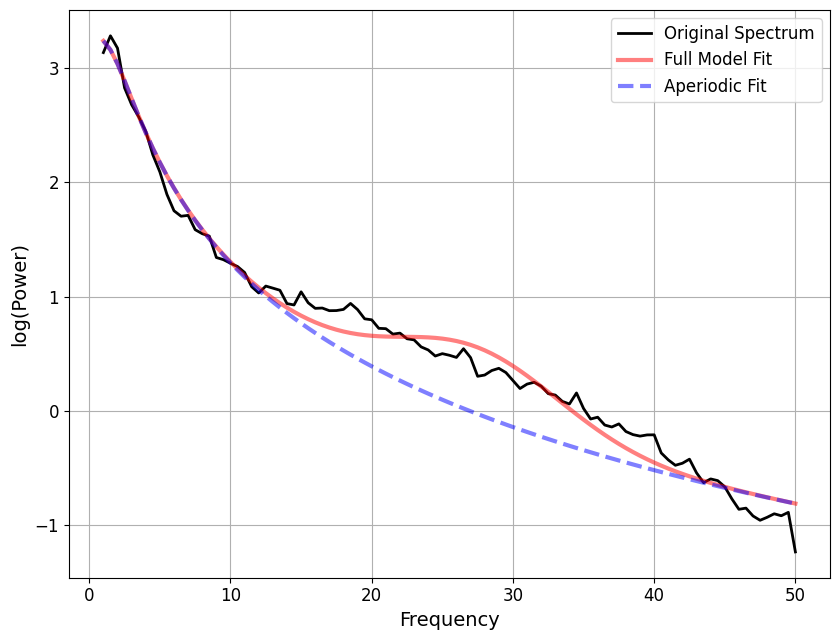

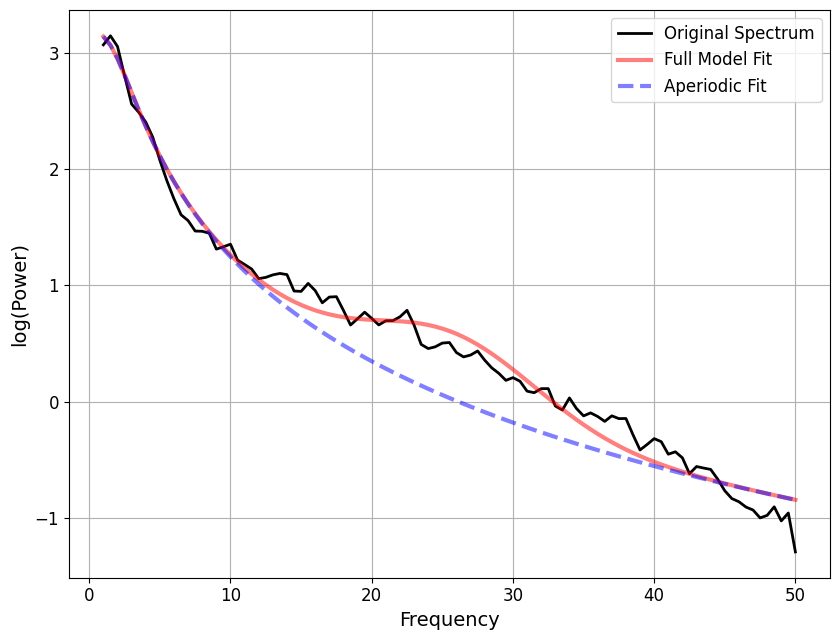

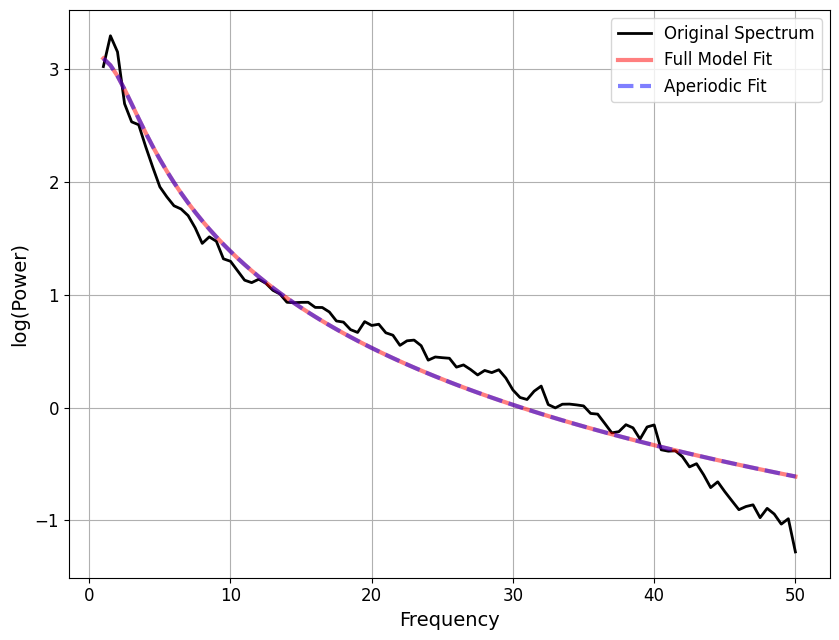

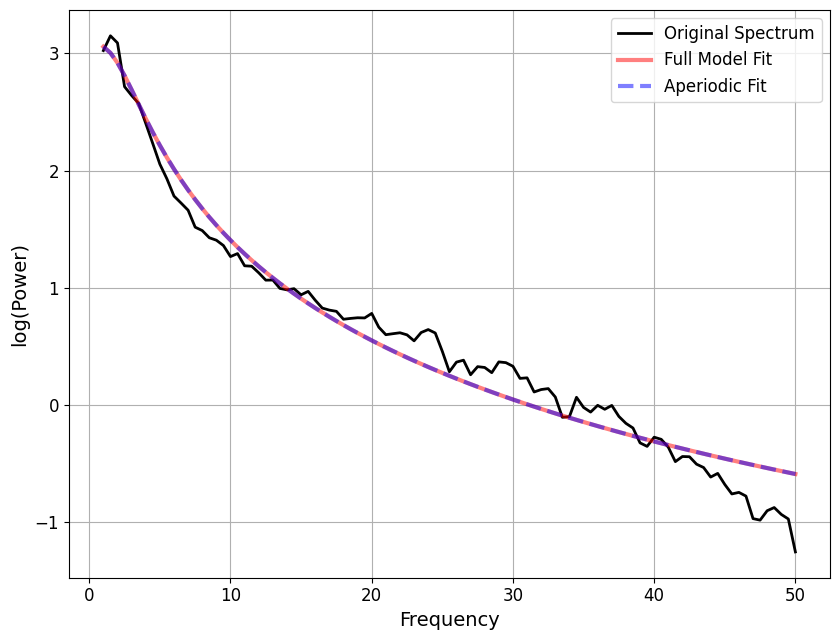

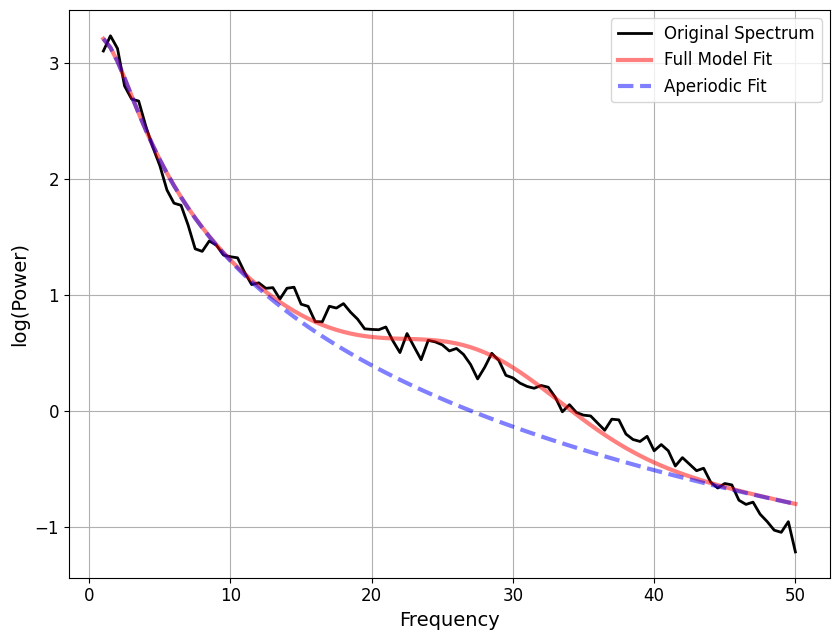

In [37]:
fooof_on_windows(10000)   #post

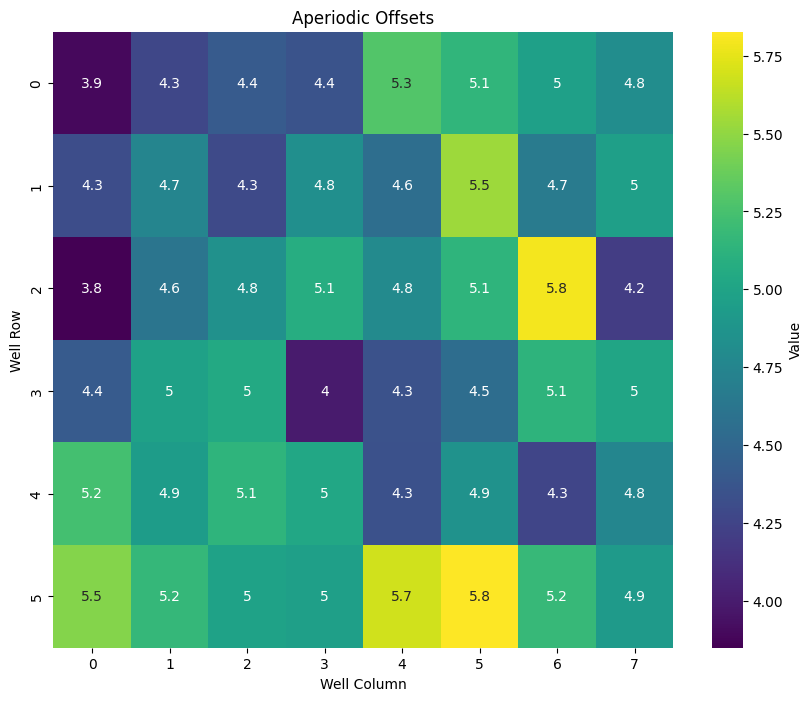

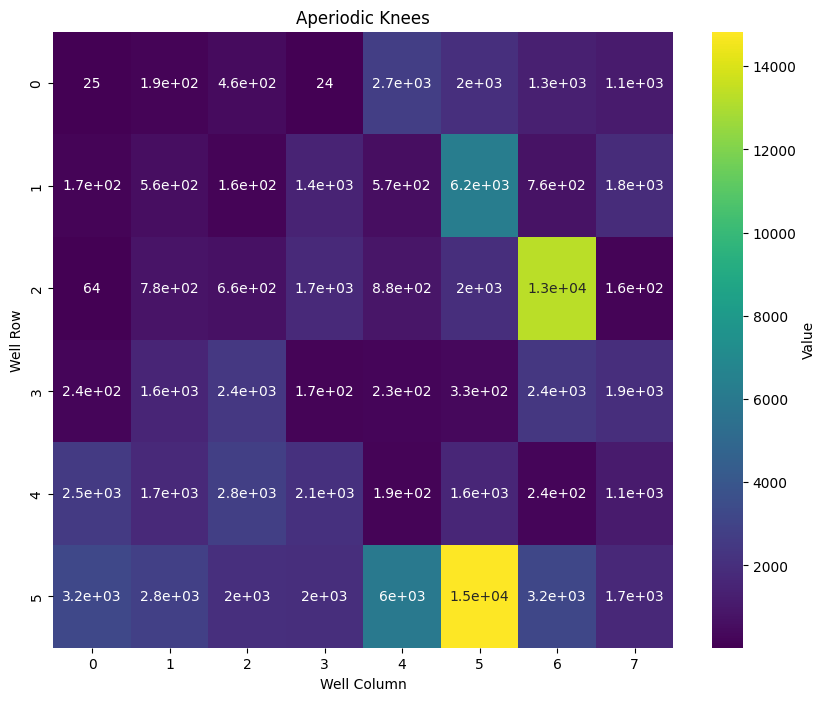

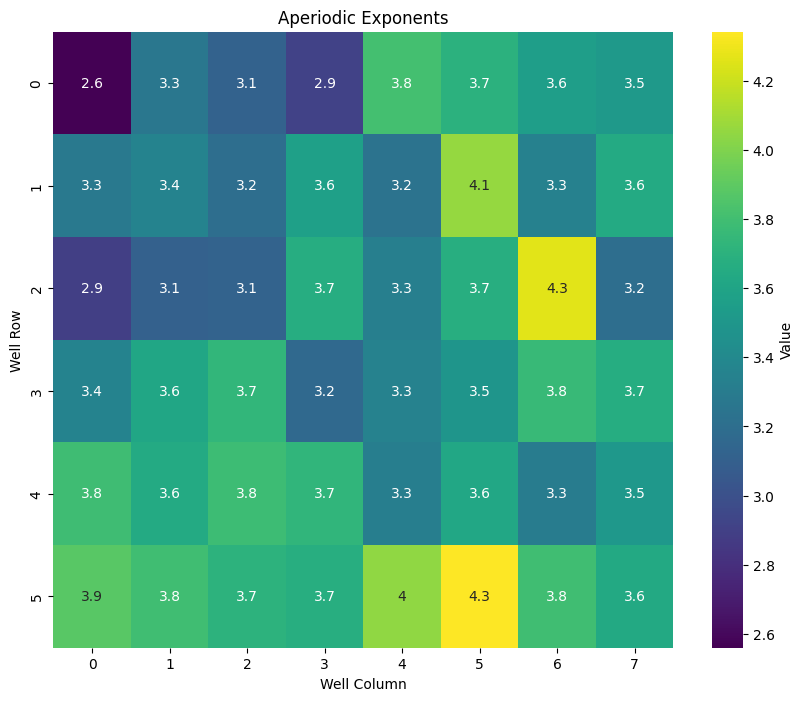

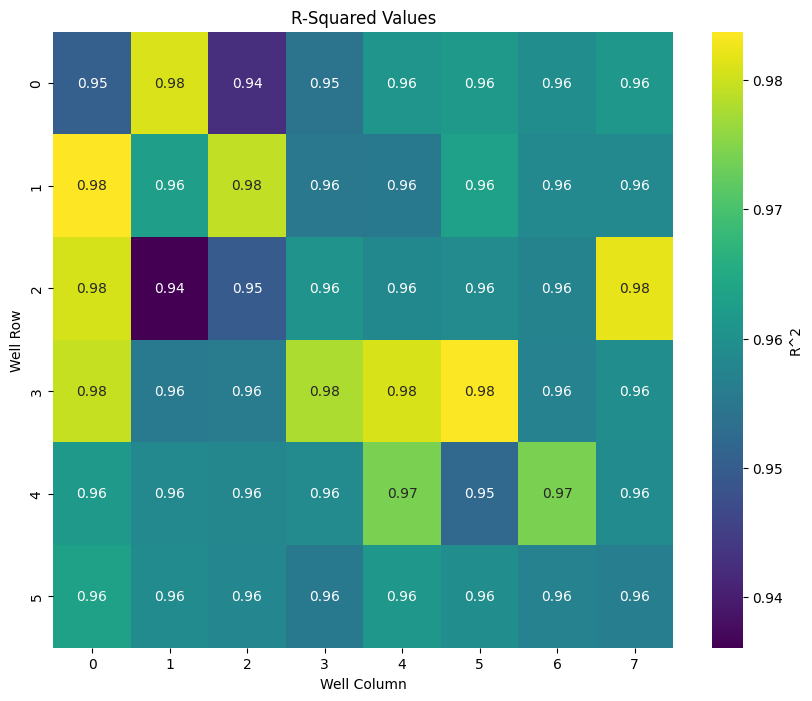

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the 3 aperiodic parameters and R^2 values into separate 6x8 arrays
offsets = np.zeros((6, 8))
knees = np.zeros((6, 8))
exponents = np.zeros((6, 8))
r_squared_values = np.zeros((6, 8))

for i in range(6):
    for j in range(8):
        offsets[i, j] = fm_array[i, j].aperiodic_params_[0]
        knees[i, j] = fm_array[i, j].aperiodic_params_[1]
        exponents[i, j] = fm_array[i, j].aperiodic_params_[2]
        r_squared_values[i, j] = fm_array[i, j].r_squared_

# Create a function to plot heatmaps
def plot_heatmap(data, title, cbar_label):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, annot=True, cmap='viridis', cbar_kws={'label': cbar_label})
    plt.title(title)
    plt.xlabel('Well Column')
    plt.ylabel('Well Row')
    plt.show()

# Plot each heatmap
plot_heatmap(offsets, 'Aperiodic Offsets', 'Value')
plot_heatmap(knees, 'Aperiodic Knees', 'Value')
plot_heatmap(exponents, 'Aperiodic Exponents', 'Value')
plot_heatmap(r_squared_values, 'R-Squared Values', 'R^2')



In [41]:
dose_grid = np.array([
    ['10uM', '10uM', '10uM', '20uM', '20uM', '20uM', 'Vehicle', 'Vehicle'],
    ['10uM', '10uM', '10uM', '20uM', '20uM', '20uM', 'Vehicle', 'Vehicle'],
    ['10uM', '10uM', '10uM', '20uM', '20uM', '20uM', 'Vehicle', 'Vehicle'],
    ['10uM', '10uM', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank'],
    ['Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank'],
    ['Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank']
])

In [57]:
peak_params = []

for i in range(6):
    for j in range(8):
        peak_param = fm_array[i, j].peak_params_
        if peak_param is not None and len(peak_param) > 0:
            peak_params.append(peak_param)


In [52]:
# Calculate standard deviation for each parameter based on the dose
def calculate_variability(param_array, dose_grid, dose):
    mask = dose_grid == dose
    return np.nanstd(param_array[mask])

variability_10uM = {
    'Aperiodic 1': calculate_variability(offsets, dose_grid, '10uM'),
    #'Aperiodic 2': calculate_variability(knees, dose_grid, '10uM'),
    'Aperiodic 3': calculate_variability(exponents, dose_grid, '10uM'),
}

variability_20uM = {
    'Aperiodic 1': calculate_variability(offsets, dose_grid, '20uM'),
    #'Aperiodic 2': calculate_variability(knees, dose_grid, '20uM'),
    'Aperiodic 3': calculate_variability(exponents, dose_grid, '20uM'),
}

variability_vehicle = {
    'Aperiodic 1': calculate_variability(offsets, dose_grid, 'Vehicle'),
    #'Aperiodic 2': calculate_variability(knees, dose_grid, 'Vehicle'),
    'Aperiodic 3': calculate_variability(exponents, dose_grid, 'Vehicle'),
}

variability_empty = {
    'Aperiodic 1': calculate_variability(offsets, dose_grid, 'Blank'),
    #'Aperiodic 2': calculate_variability(knees, dose_grid, 'Blank'),
    'Aperiodic 3': calculate_variability(exponents, dose_grid, 'Blank'),
}

C:\Users\david\AppData\Local\Temp\ipykernel_6168\2494785242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette="viridis")


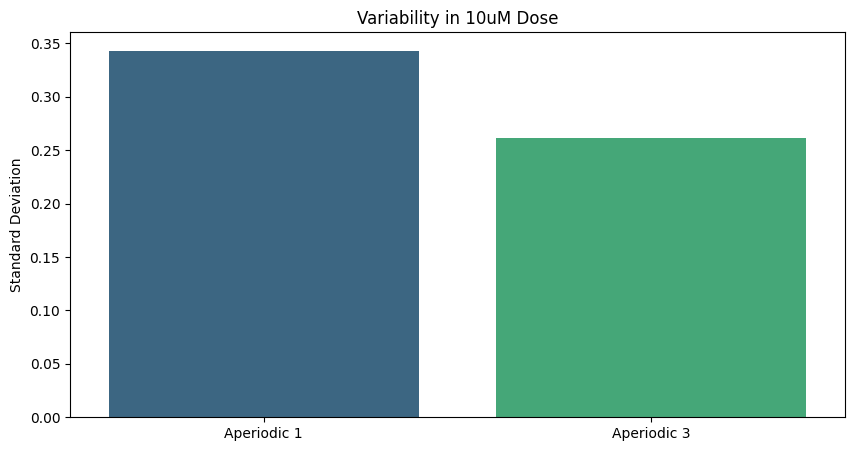

C:\Users\david\AppData\Local\Temp\ipykernel_6168\2494785242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette="viridis")


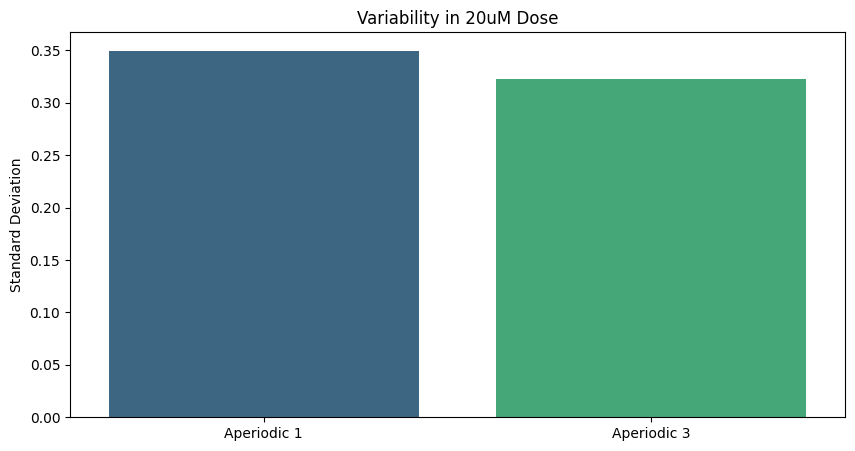

C:\Users\david\AppData\Local\Temp\ipykernel_6168\2494785242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette="viridis")


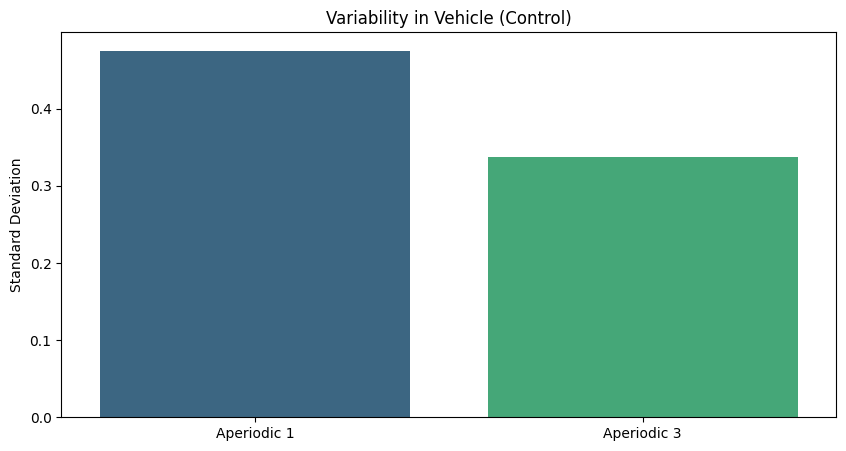

C:\Users\david\AppData\Local\Temp\ipykernel_6168\2494785242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette="viridis")


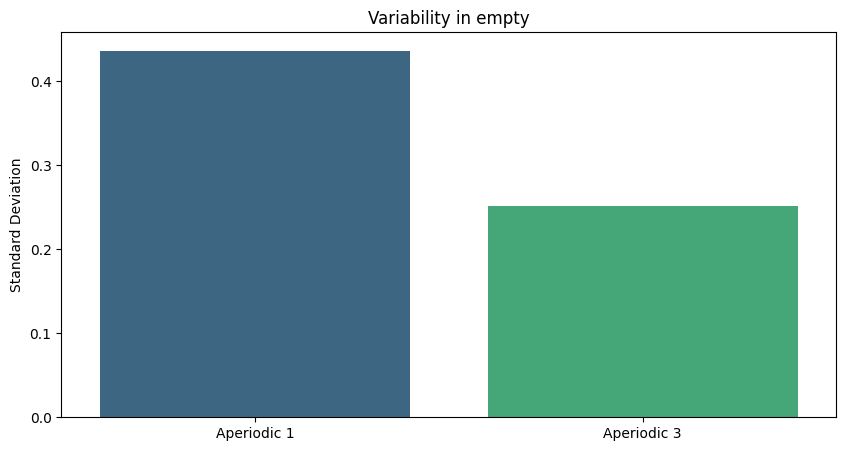

In [53]:
def plot_variability(variability_dict, title):
    categories = list(variability_dict.keys())
    values = list(variability_dict.values())
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=categories, y=values, palette="viridis")
    plt.title(title)
    plt.ylabel('Standard Deviation')
    plt.show()

plot_variability(variability_10uM, 'Variability in 10uM Dose')
plot_variability(variability_20uM, 'Variability in 20uM Dose')
plot_variability(variability_vehicle, 'Variability in Vehicle (Control)')
plot_variability(variability_empty, 'Variability in empty')


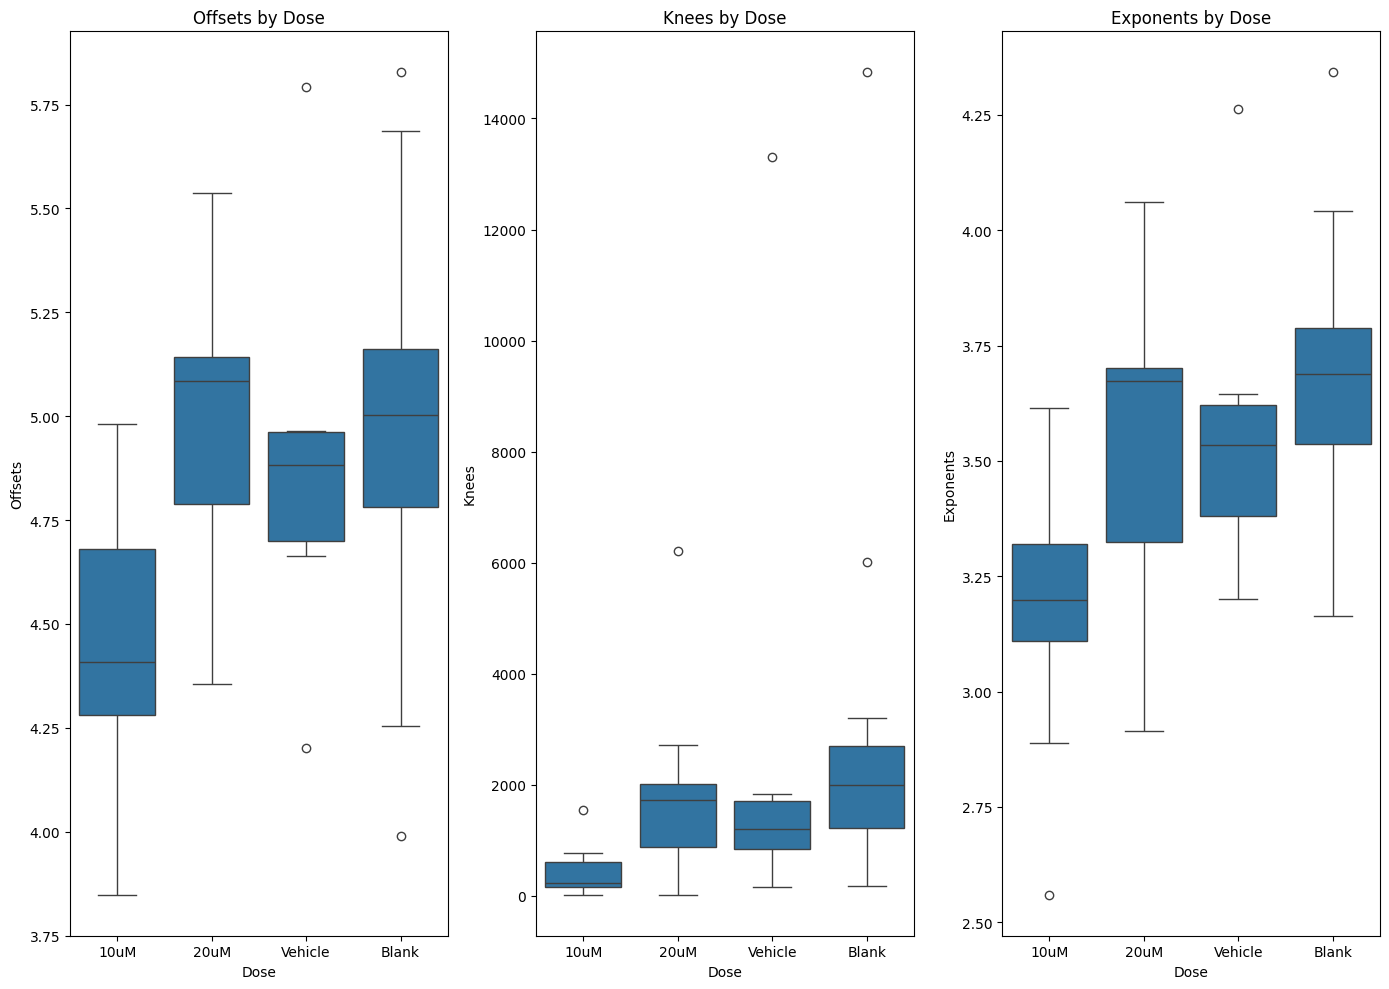

In [62]:
dose_labels = []
aperiodic_param_1_list = []
aperiodic_param_2_list = []
aperiodic_param_3_list = []

# Loop through each well and collect data
for i in range(6):
    for j in range(8):
        dose = dose_grid[i, j]
        #if dose in grouped_params:
            # Ensure that aperiodic parameters are not None or empty
        if offsets[i, j] is not None and knees[i, j] is not None and exponents[i, j] is not None:
            dose_labels.append(dose)
            aperiodic_param_1_list.append(offsets[i, j])
            aperiodic_param_2_list.append(knees[i, j])
            aperiodic_param_3_list.append(exponents[i, j])

# Create a DataFrame
df = pd.DataFrame({
    'Dose': dose_labels,
    'Offsets': aperiodic_param_1_list,
    'Knees': aperiodic_param_2_list,
    'Exponents': aperiodic_param_3_list
})

# Plotting boxplots for each aperiodic parameter
plt.figure(figsize=(14, 10))

for idx, param in enumerate(['Offsets', 'Knees', 'Exponents'], 1):
    plt.subplot(1, 3, idx)
    sns.boxplot(x='Dose', y=param, data=df)
    plt.title(f'{param} by Dose')
    plt.xlabel('Dose')
    plt.ylabel(param)

plt.tight_layout()
plt.show()


In [58]:
peak_params

[array([[30.65825359,  0.76044502, 12.        ]]),
 array([[25.0479654 ,  0.4398757 , 11.99999994]]),
 array([[25.0479654 ,  0.43760248, 12.        ]]),
 array([[22.5864796 ,  1.19460104,  1.20604139]]),
 array([[23.7739827 ,  0.39723355, 12.        ]]),
 array([[37.4520346 ,  0.34679396, 12.        ]]),
 array([[25.0479654 ,  0.40842415, 11.99999999]]),
 array([[38.7260173 ,  0.33085767, 11.99999971]]),
 array([[25.0479654 ,  0.41151867, 12.        ]]),
 array([[25.0479654 ,  0.43763081, 12.        ]]),
 array([[25.0479654 ,  0.43858238, 12.        ]]),
 array([[25.0479654 ,  0.44069856, 12.        ]]),
 array([[26.3219481 ,  0.48549632, 12.        ]]),
 array([[23.7739827 ,  0.41752775, 11.99999946]]),
 array([[25.0479654 ,  0.43927681, 12.        ]]),
 array([[37.4520346 ,  0.38532129, 11.99999987]])]

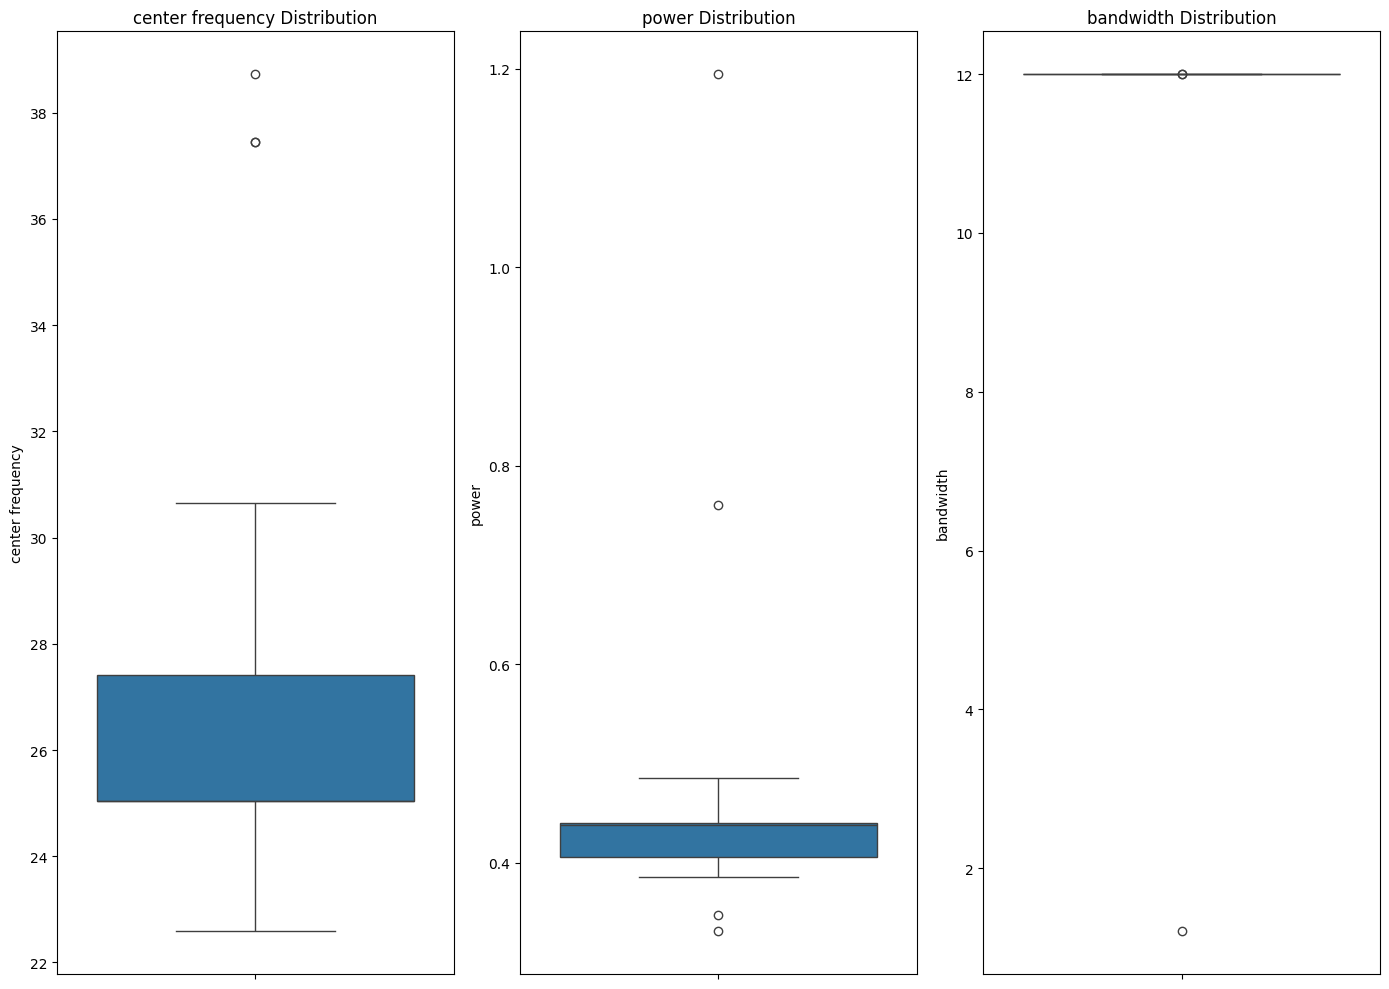

In [64]:
peak_param_1_list = []
peak_param_2_list = []
peak_param_3_list = []

# Extract the peak parameters
for params in peak_params:
    peak_param_1_list.append(params[0, 0])
    peak_param_2_list.append(params[0, 1])
    peak_param_3_list.append(params[0, 2])

# Create a DataFrame
df_peak = pd.DataFrame({
    'center frequency': peak_param_1_list,
    'power': peak_param_2_list,
    'bandwidth': peak_param_3_list
})

# Plotting boxplots for each peak parameter
plt.figure(figsize=(14, 10))

for idx, param in enumerate(['center frequency', 'power', 'bandwidth'], 1):
    plt.subplot(1, 3, idx)
    sns.boxplot(y=param, data=df_peak)
    plt.title(f'{param} Distribution')
    plt.xlabel('')

plt.tight_layout()
plt.show()